# Classifying the level of damage from accident data.

## Data Overview

## Dataset Description

## Files

* **Praktikum_2_ML(train).csv** - Dataset untuk train / dilatih
* **Praktikum_2_ML(test).csv** - Dataset untuk test / menghasilkan submisi
* **Praktikum_2_ML(contoh).csv** - Contoh format pengumpulan

## Columns

* `crash_record_id` - ID unik yang mengidentifikasi setiap catatan kecelakaan.
* `tanggal_kecelakaan` - Tanggal terjadinya kecelakaan.
* `longitude` - Koordinat garis bujur lokasi kecelakaan.
* `latitude` - Koordinat garis lintang lokasi kecelakaan.
* `batas_kecepatan_terpasang` - Batas kecepatan yang terpasang di lokasi kecelakaan.
* `kondisi_perangkat` - Status perangkat yang terlibat dalam kecelakaan (misalnya, berfungsi/tidak berfungsi).
* `kondisi_cuaca` - Kondisi cuaca saat kecelakaan terjadi (misalnya, cerah, hujan, berkabut).
* `kondisi_pencahayaan` - Kondisi pencahayaan pada saat kecelakaan (misalnya, terang, gelap, senja).
* `jenis_jalan` - Jenis jalan di mana kecelakaan terjadi.
* `kondisi_permukaan_jalan` - Deskripsi kondisi permukaan jalan (misalnya, kering, basah, berlubang).
* `cacat_jalan` - Keberadaan cacat atau kerusakan pada jalan.
* `jenis_laporan` - Tipe laporan kecelakaan.
* `jenis_tabrakan_pertama` - Tipe tabrakan yang pertama terjadi (misalnya, tabrakan depan, samping).
* `jenis_kecelakaan` - Kategori umum kecelakaan.
* `jumlah_unit` - Jumlah kendaraan yang terlibat dalam kecelakaan.
* `penyebab_kecelakaan_utama` - Penyebab utama yang diidentifikasi untuk kecelakaan.
* `penyebab_kecelakaan_lain` - Penyebab lain yang mungkin berkontribusi pada kecelakaan.
* `cedera_terparah` - Jenis cedera terparah yang dialami.
* `jumlah_cedera` - Total jumlah cedera yang dilaporkan.
* `cedera_fatal` - Jumlah cedera yang berujung pada kematian.
* `cedera_serius` - Jumlah cedera serius yang dilaporkan.
* `cedera_tidak_serius` - Jumlah cedera yang tidak serius.
* `cedera_dilaporkan_tidak_nyata` - Jumlah cedera yang dilaporkan tetapi tidak dapat diidentifikasi.
* `tidak_ada_indikasi_cedera` - Jumlah kasus di mana tidak ada indikasi cedera.
* `kerusakan` - Deskripsi mengenai kerusakan yang terjadi pada kendaraan atau properti.


## Importing Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

### Reading Datasets

In [59]:
df = pd.read_csv('Praktikum_2_ML(train).csv')

In [60]:
df.head().T

,0,1,2,3,4
crash_record_id,1bc86617362be59edff39dc8eb3110c8521809fd59975c...,7af6ea16e1773daeab1b4955bd1a2997e22a66133f751d...,aa7e5680ae512f08cfceac7995088be2f6e6768d4462fb...,8868b3d93fce810fb2bb641ef2e6825642e5159f8d608b...,715439ffa95de3a122edf10654426e7f6ecedcd5398aab...
tanggal_kecelakaan,06/01/2018 04:35:00 PM,02/06/2019 03:30:00 PM,06/17/2017 10:05:00 PM,08/09/2023 12:20:00 PM,09/17/2023 04:19:00 PM
longitude,-87.723019,-87.678016,-87.702085,-87.659829,-87.774777
latitude,41.785826,41.924513,41.946539,41.696878,41.971278
batas_kecepatan_terpasang,30,30,30,35,20
kondisi_perangkat,NO CONTROLS,NO CONTROLS,UNKNOWN,NO CONTROLS,NO CONTROLS
kondisi_cuaca,CLEAR,CLEAR,UNKNOWN,CLEAR,CLEAR
kondisi_pencahayaan,DAYLIGHT,DARKNESS,"DARKNESS, LIGHTED ROAD",DAYLIGHT,DAYLIGHT
jenis_jalan,NOT DIVIDED,NOT DIVIDED,PARKING LOT,NOT DIVIDED,ONE-WAY
kondisi_permukaan_jalan,DRY,DRY,UNKNOWN,DRY,DRY


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_record_id                11250 non-null  object 
 1   tanggal_kecelakaan             11250 non-null  object 
 2   longitude                      11250 non-null  float64
 3   latitude                       11250 non-null  float64
 4   batas_kecepatan_terpasang      11250 non-null  int64  
 5   kondisi_perangkat              11250 non-null  object 
 6   kondisi_cuaca                  11250 non-null  object 
 7   kondisi_pencahayaan            11250 non-null  object 
 8   jenis_jalan                    11250 non-null  object 
 9   kondisi_permukaan_jalan        11250 non-null  object 
 10  cacat_jalan                    11250 non-null  object 
 11  jenis_laporan                  11250 non-null  object 
 12  jenis_tabrakan_pertama         11250 non-null 

In [62]:
df.tail()

,crash_record_id,tanggal_kecelakaan,longitude,latitude,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,...,penyebab_kecelakaan_utama,penyebab_kecelakaan_lain,cedera_terparah,jumlah_cedera,cedera_fatal,cedera_serius,cedera_tidak_serius,cedera_dilaporkan_tidak_nyata,tidak_ada_indikasi_cedera,kerusakan
11245,e71e5a43b4d220f5678c3e6dc7a61d5f90d4c817afac56...,12/12/2020 06:00:00 PM,-87.740532,41.741866,30,OTHER,RAIN,"DARKNESS, LIGHTED ROAD",FOUR WAY,WET,...,FAILING TO REDUCE SPEED TO AVOID CRASH,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
11246,f4e097a601599b5fa2ce120c193ec34bd8894570c272a9...,03/03/2023 05:50:00 PM,-87.620425,41.894304,25,NO CONTROLS,CLEAR,DARKNESS,ONE-WAY,DRY,...,IMPROPER OVERTAKING/PASSING,UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
11247,8b23320b596ec57560b25a95fcacaeb356bbe753c71cb1...,04/04/2016 01:40:00 PM,-87.672291,41.895880,30,NO CONTROLS,RAIN,DAYLIGHT,NOT DIVIDED,WET,...,IMPROPER LANE USAGE,FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,"OVER $1,500"
11248,a8755873f051a358d33315a6c5ecabb6de3d06b3465523...,07/22/2017 06:50:00 PM,-87.656059,41.946569,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ONE-WAY,DRY,...,IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
11249,737b3c40f4a6f9b8188c278e292b75b2d6d2f2323814fb...,06/24/2019 06:15:00 AM,-87.626723,41.887443,30,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",OTHER,DRY,...,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,"OVER $1,500"


In [63]:
df.isnull().sum()

crash_record_id                  0
tanggal_kecelakaan               0
longitude                        0
latitude                         0
batas_kecepatan_terpasang        0
kondisi_perangkat                0
kondisi_cuaca                    0
kondisi_pencahayaan              0
jenis_jalan                      0
kondisi_permukaan_jalan          0
cacat_jalan                      0
jenis_laporan                    0
jenis_tabrakan_pertama           0
jenis_kecelakaan                 0
jumlah_unit                      0
penyebab_kecelakaan_utama        0
penyebab_kecelakaan_lain         0
cedera_terparah                  0
jumlah_cedera                    0
cedera_fatal                     0
cedera_serius                    0
cedera_tidak_serius              0
cedera_dilaporkan_tidak_nyata    0
tidak_ada_indikasi_cedera        0
kerusakan                        0
dtype: int64

In [64]:
df.isna().sum()

crash_record_id                  0
tanggal_kecelakaan               0
longitude                        0
latitude                         0
batas_kecepatan_terpasang        0
kondisi_perangkat                0
kondisi_cuaca                    0
kondisi_pencahayaan              0
jenis_jalan                      0
kondisi_permukaan_jalan          0
cacat_jalan                      0
jenis_laporan                    0
jenis_tabrakan_pertama           0
jenis_kecelakaan                 0
jumlah_unit                      0
penyebab_kecelakaan_utama        0
penyebab_kecelakaan_lain         0
cedera_terparah                  0
jumlah_cedera                    0
cedera_fatal                     0
cedera_serius                    0
cedera_tidak_serius              0
cedera_dilaporkan_tidak_nyata    0
tidak_ada_indikasi_cedera        0
kerusakan                        0
dtype: int64

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,11250.0,-87.653972,1.432811,-87.905309,-87.719382,-87.671269,-87.633000,0.00000
latitude,11250.0,41.848897,0.688929,0.000000,41.787208,41.876697,41.925263,42.02266
batas_kecepatan_terpasang,11250.0,28.165067,6.263075,0.000000,30.000000,30.000000,30.000000,99.00000
jumlah_unit,11250.0,2.011200,0.394489,1.000000,2.000000,2.000000,2.000000,8.00000
jumlah_cedera,11250.0,0.166933,0.489420,0.000000,0.000000,0.000000,0.000000,6.00000
cedera_fatal,11250.0,0.000444,0.021078,0.000000,0.000000,0.000000,0.000000,1.00000
cedera_serius,11250.0,0.018489,0.150902,0.000000,0.000000,0.000000,0.000000,3.00000
cedera_tidak_serius,11250.0,0.094311,0.371073,0.000000,0.000000,0.000000,0.000000,6.00000
cedera_dilaporkan_tidak_nyata,11250.0,0.053689,0.274817,0.000000,0.000000,0.000000,0.000000,5.00000
tidak_ada_indikasi_cedera,11250.0,1.966044,1.126895,0.000000,1.000000,2.000000,2.000000,34.00000


In [66]:
df.nunique()

crash_record_id                  11250
tanggal_kecelakaan               11156
longitude                        10190
latitude                         10190
batas_kecepatan_terpasang           19
kondisi_perangkat                    8
kondisi_cuaca                       11
kondisi_pencahayaan                  6
jenis_jalan                         20
kondisi_permukaan_jalan              7
cacat_jalan                          7
jenis_laporan                        3
jenis_tabrakan_pertama              17
jenis_kecelakaan                     2
jumlah_unit                          8
penyebab_kecelakaan_utama           39
penyebab_kecelakaan_lain            40
cedera_terparah                      5
jumlah_cedera                        7
cedera_fatal                         2
cedera_serius                        4
cedera_tidak_serius                  7
cedera_dilaporkan_tidak_nyata        6
tidak_ada_indikasi_cedera           15
kerusakan                            3
dtype: int64

### Explorartory Data Analytics (EDA)

In [67]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['crash_record_id', 'tanggal_kecelakaan', 'kondisi_perangkat', 'kondisi_cuaca', 'kondisi_pencahayaan', 'jenis_jalan', 'kondisi_permukaan_jalan', 'cacat_jalan', 'jenis_laporan', 'jenis_tabrakan_pertama', 'jenis_kecelakaan', 'penyebab_kecelakaan_utama', 'penyebab_kecelakaan_lain', 'cedera_terparah', 'kerusakan']
Numerical Variables:
['longitude', 'latitude', 'batas_kecepatan_terpasang', 'jumlah_unit', 'jumlah_cedera', 'cedera_fatal', 'cedera_serius', 'cedera_tidak_serius', 'cedera_dilaporkan_tidak_nyata', 'tidak_ada_indikasi_cedera']


In [68]:
for col in cat_cols:
    print(f"{col}")
    print(f"{df[col].unique()[:20].tolist()}\n\n")

crash_record_id
['1bc86617362be59edff39dc8eb3110c8521809fd59975c8423b2cc96c81a797ff036404c19318623ca7619fed4586a1d273e6ef86f2c93884d8d31e6461f7a29', '7af6ea16e1773daeab1b4955bd1a2997e22a66133f751d6fbf986f016a1a2c8117cb466aa286c53f9df8b9d8f91869753905b152c8c3ccc5427ec4c14aa7c435', 'aa7e5680ae512f08cfceac7995088be2f6e6768d4462fb0a1c66d2350b4f38714d56bfb0d5f714e9e95d69d0972deb5e8a4cbdc63ac30b42613ac6e865995cc4', '8868b3d93fce810fb2bb641ef2e6825642e5159f8d608b3c86ae9a9275c344ac669cdb8e435c22977effafffc017b544d3ea5b400515a6f372e2c5a4eea08288', '715439ffa95de3a122edf10654426e7f6ecedcd5398aabed3424742334eb9286956796f43c5eac8591b34a509054d02efc19428354ded45885ddf9c71116f541', '2770d00ff696691baa36f4c2e2d900ee744e1a8fe8d75673b9b02232bfd533e68888667dda10429f55e0c5cbabdddde50c3dad1ba44dc792e0cbe9f661ff0f59', '4d4fc8e5150b237e1ea52990c9079b7dd5177535027f9179b630d202fcffb4447a154cd2cae11eb95e51d24288a5646063da29ade4958c12716b4f74362a82f3', 'a32b7b5897ee6d026d0a6dc7a85f9270ef977081e4e380d665244a931c

In [69]:
for col in cat_cols:
    print(f"{col} has 'UNKNOWN' value",df[df[col] == 'UNKNOWN'][col].count())

crash_record_id has 'UNKNOWN' value 0
tanggal_kecelakaan has 'UNKNOWN' value 0
kondisi_perangkat has 'UNKNOWN' value 729
kondisi_cuaca has 'UNKNOWN' value 597
kondisi_pencahayaan has 'UNKNOWN' value 479
jenis_jalan has 'UNKNOWN' value 133
kondisi_permukaan_jalan has 'UNKNOWN' value 916
cacat_jalan has 'UNKNOWN' value 1907
jenis_laporan has 'UNKNOWN' value 0
jenis_tabrakan_pertama has 'UNKNOWN' value 0
jenis_kecelakaan has 'UNKNOWN' value 0
penyebab_kecelakaan_utama has 'UNKNOWN' value 0
penyebab_kecelakaan_lain has 'UNKNOWN' value 0
cedera_terparah has 'UNKNOWN' value 0
kerusakan has 'UNKNOWN' value 0


longitude
Skew : 61.07


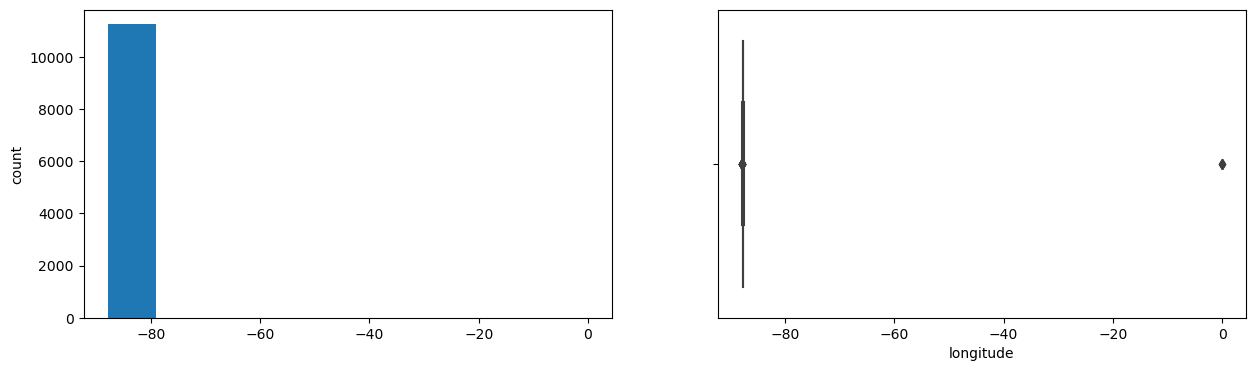

latitude
Skew : -59.79


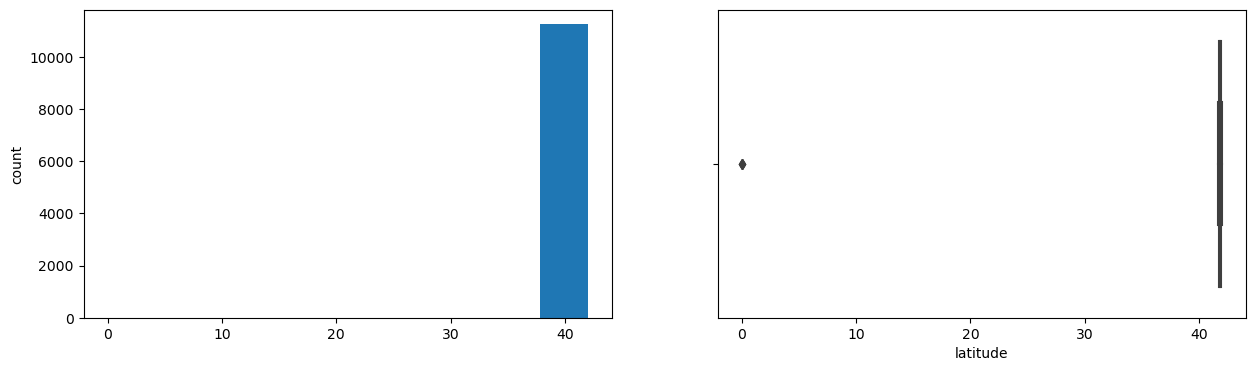

batas_kecepatan_terpasang
Skew : -1.8


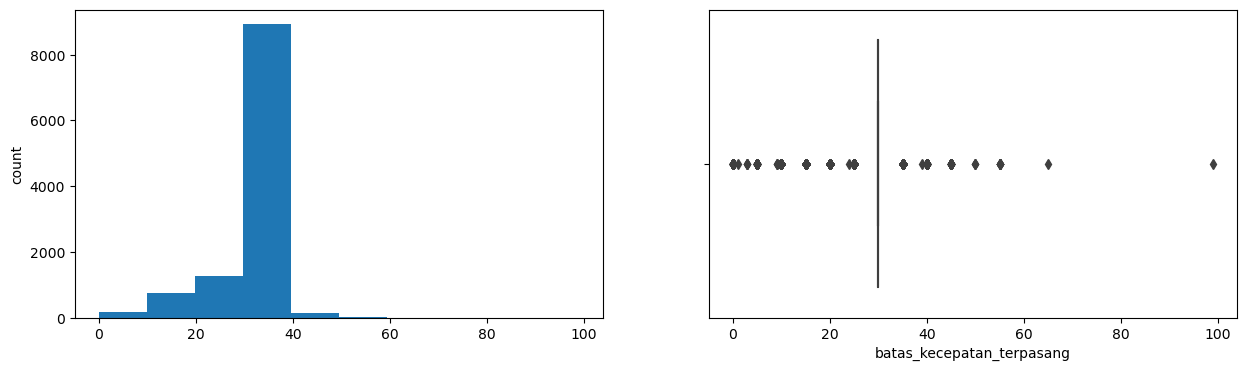

jumlah_unit
Skew : 2.39


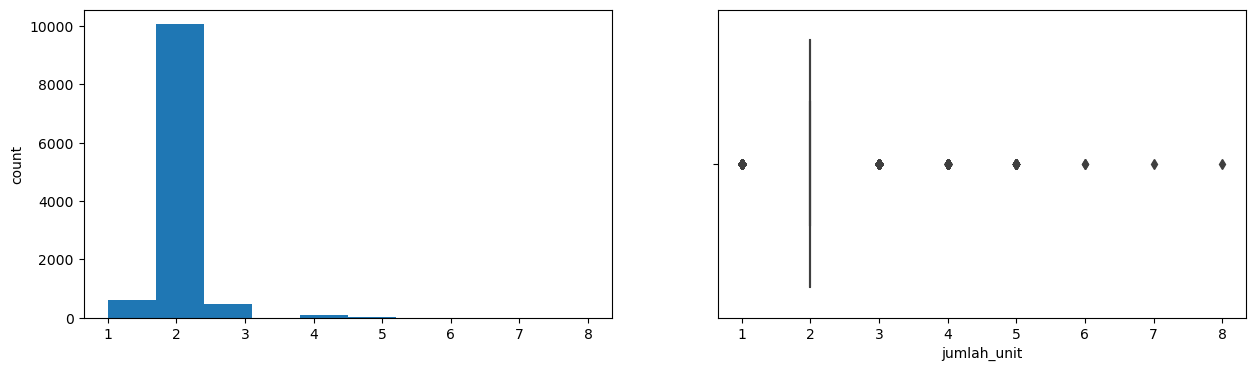

jumlah_cedera
Skew : 4.18


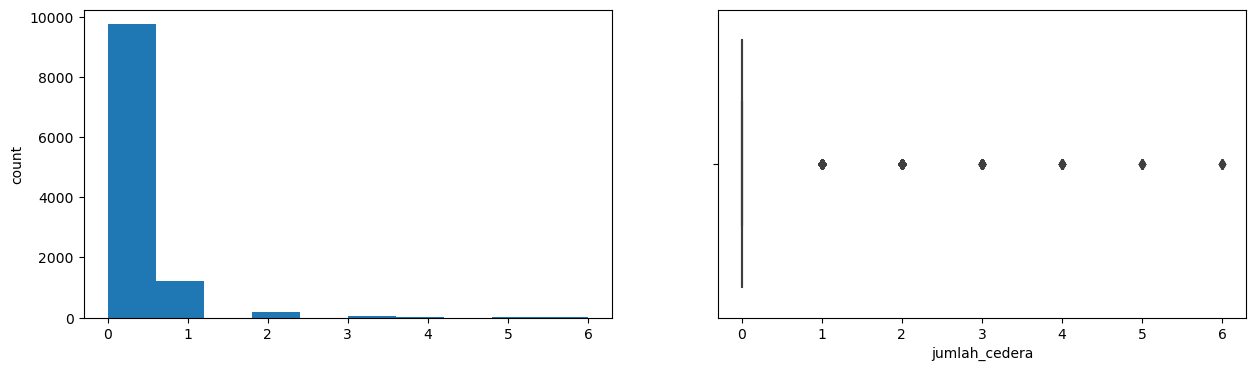

cedera_fatal
Skew : 47.41


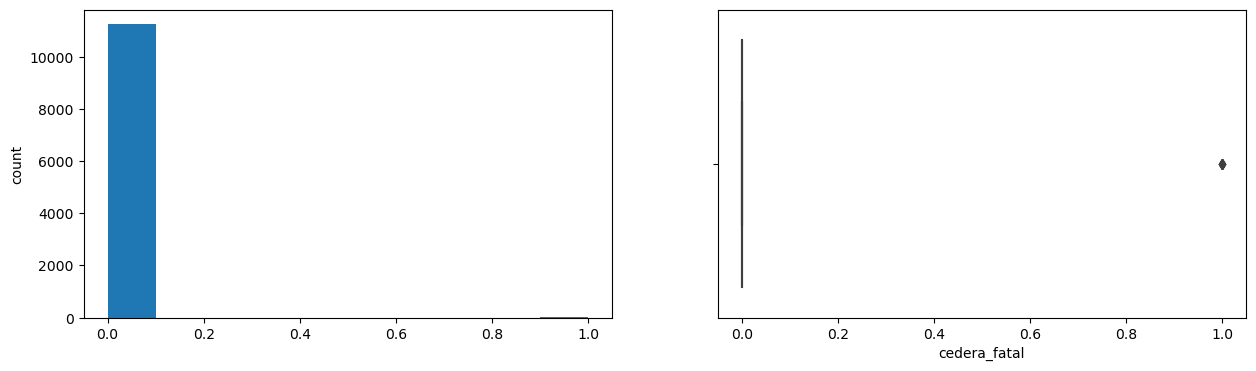

cedera_serius
Skew : 9.67


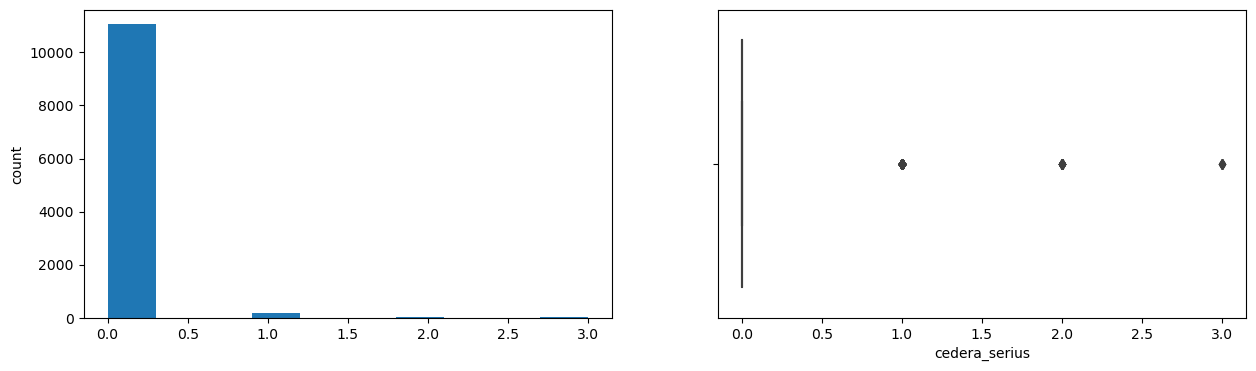

cedera_tidak_serius
Skew : 5.64


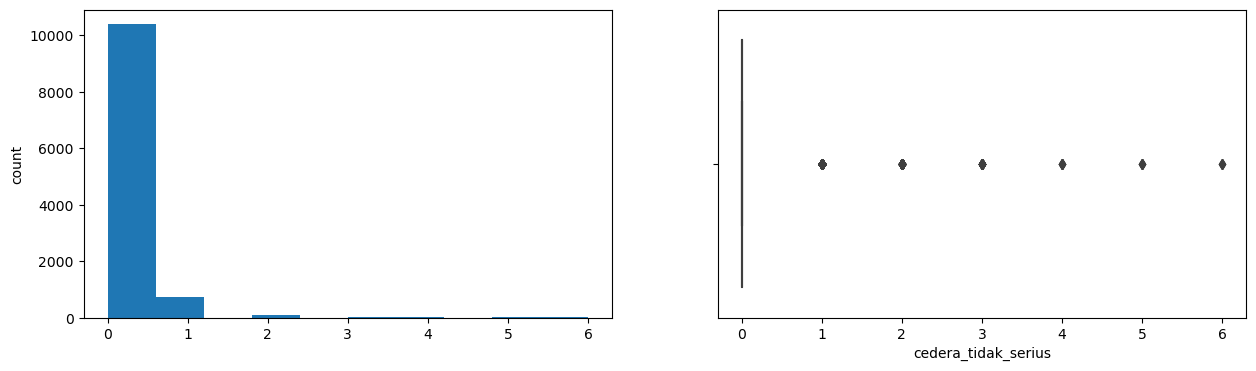

cedera_dilaporkan_tidak_nyata
Skew : 6.54


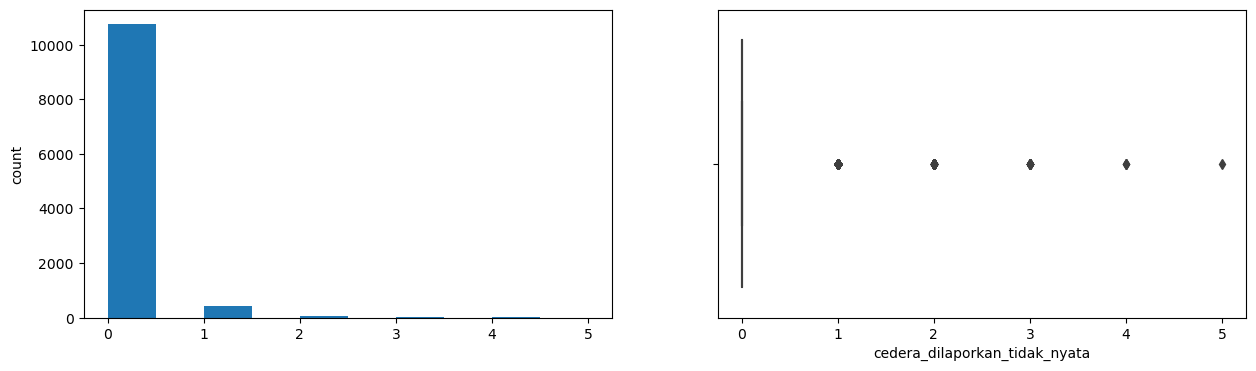

tidak_ada_indikasi_cedera
Skew : 4.46


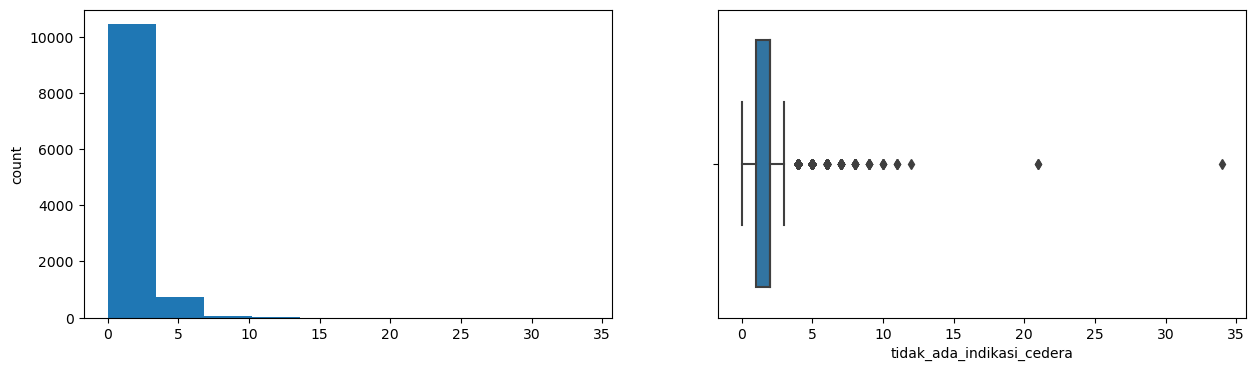

In [70]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [71]:
df.head()

,crash_record_id,tanggal_kecelakaan,longitude,latitude,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,...,penyebab_kecelakaan_utama,penyebab_kecelakaan_lain,cedera_terparah,jumlah_cedera,cedera_fatal,cedera_serius,cedera_tidak_serius,cedera_dilaporkan_tidak_nyata,tidak_ada_indikasi_cedera,kerusakan
0,1bc86617362be59edff39dc8eb3110c8521809fd59975c...,06/01/2018 04:35:00 PM,-87.723019,41.785826,30,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,...,FAILING TO YIELD RIGHT-OF-WAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,"OVER $1,500"
1,7af6ea16e1773daeab1b4955bd1a2997e22a66133f751d...,02/06/2019 03:30:00 PM,-87.678016,41.924513,30,NO CONTROLS,CLEAR,DARKNESS,NOT DIVIDED,DRY,...,IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
2,aa7e5680ae512f08cfceac7995088be2f6e6768d4462fb...,06/17/2017 10:05:00 PM,-87.702085,41.946539,30,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKING LOT,UNKNOWN,...,EXCEEDING SAFE SPEED FOR CONDITIONS,EXCEEDING SAFE SPEED FOR CONDITIONS,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,"$501 - $1,500"
3,8868b3d93fce810fb2bb641ef2e6825642e5159f8d608b...,08/09/2023 12:20:00 PM,-87.659829,41.696878,35,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,...,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
4,715439ffa95de3a122edf10654426e7f6ecedcd5398aab...,09/17/2023 04:19:00 PM,-87.774777,41.971278,20,NO CONTROLS,CLEAR,DAYLIGHT,ONE-WAY,DRY,...,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,"OVER $1,500"


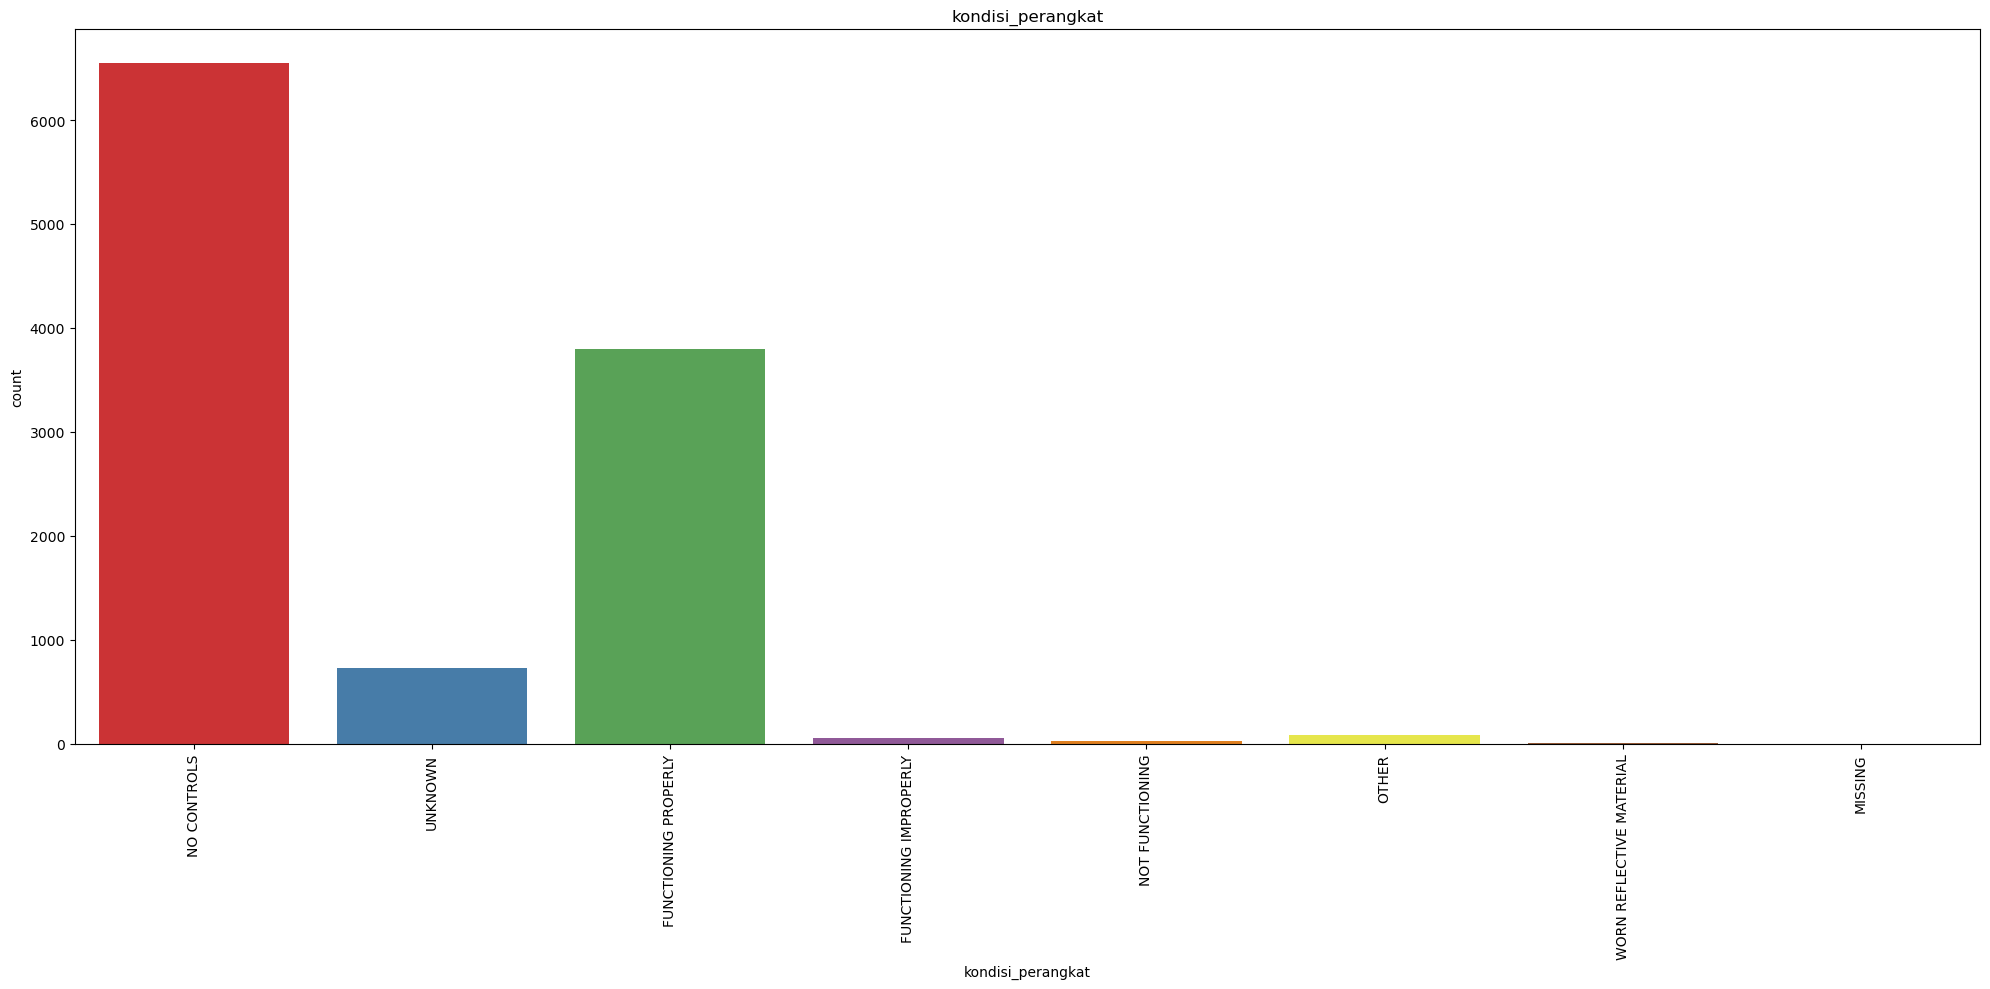

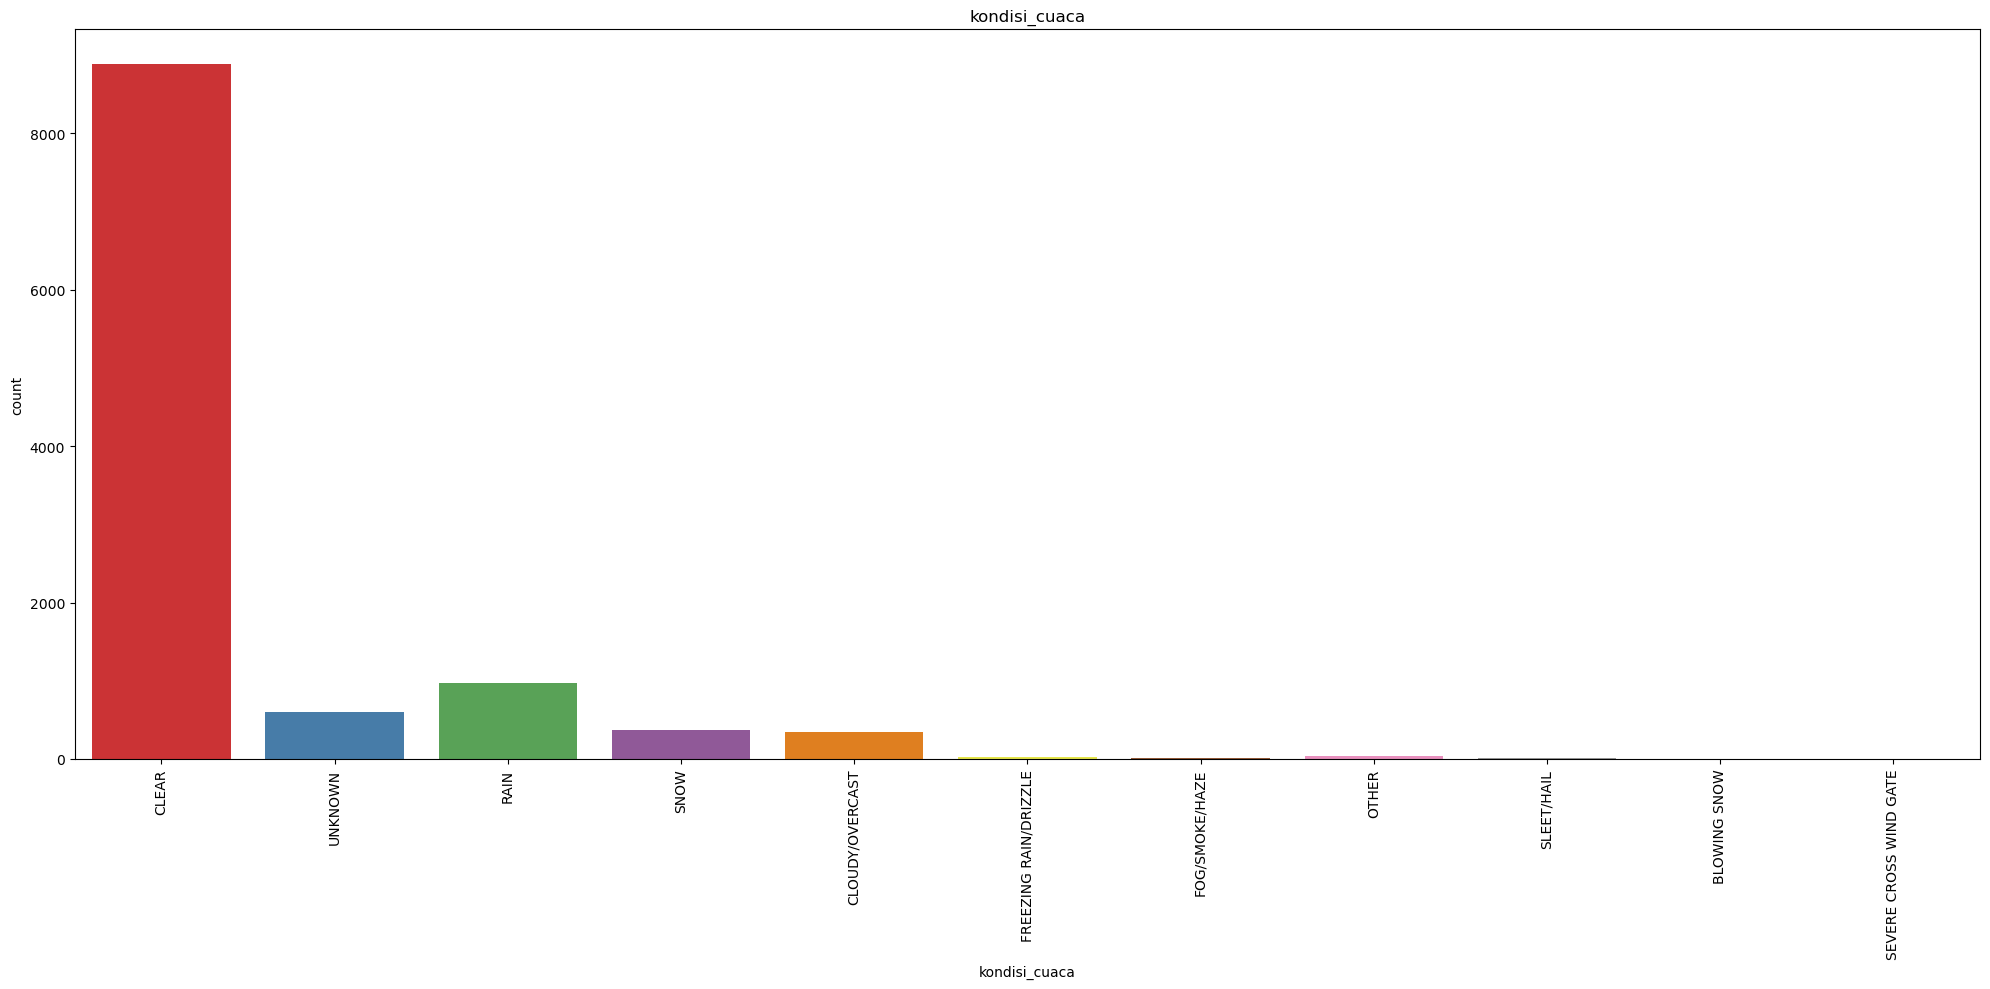

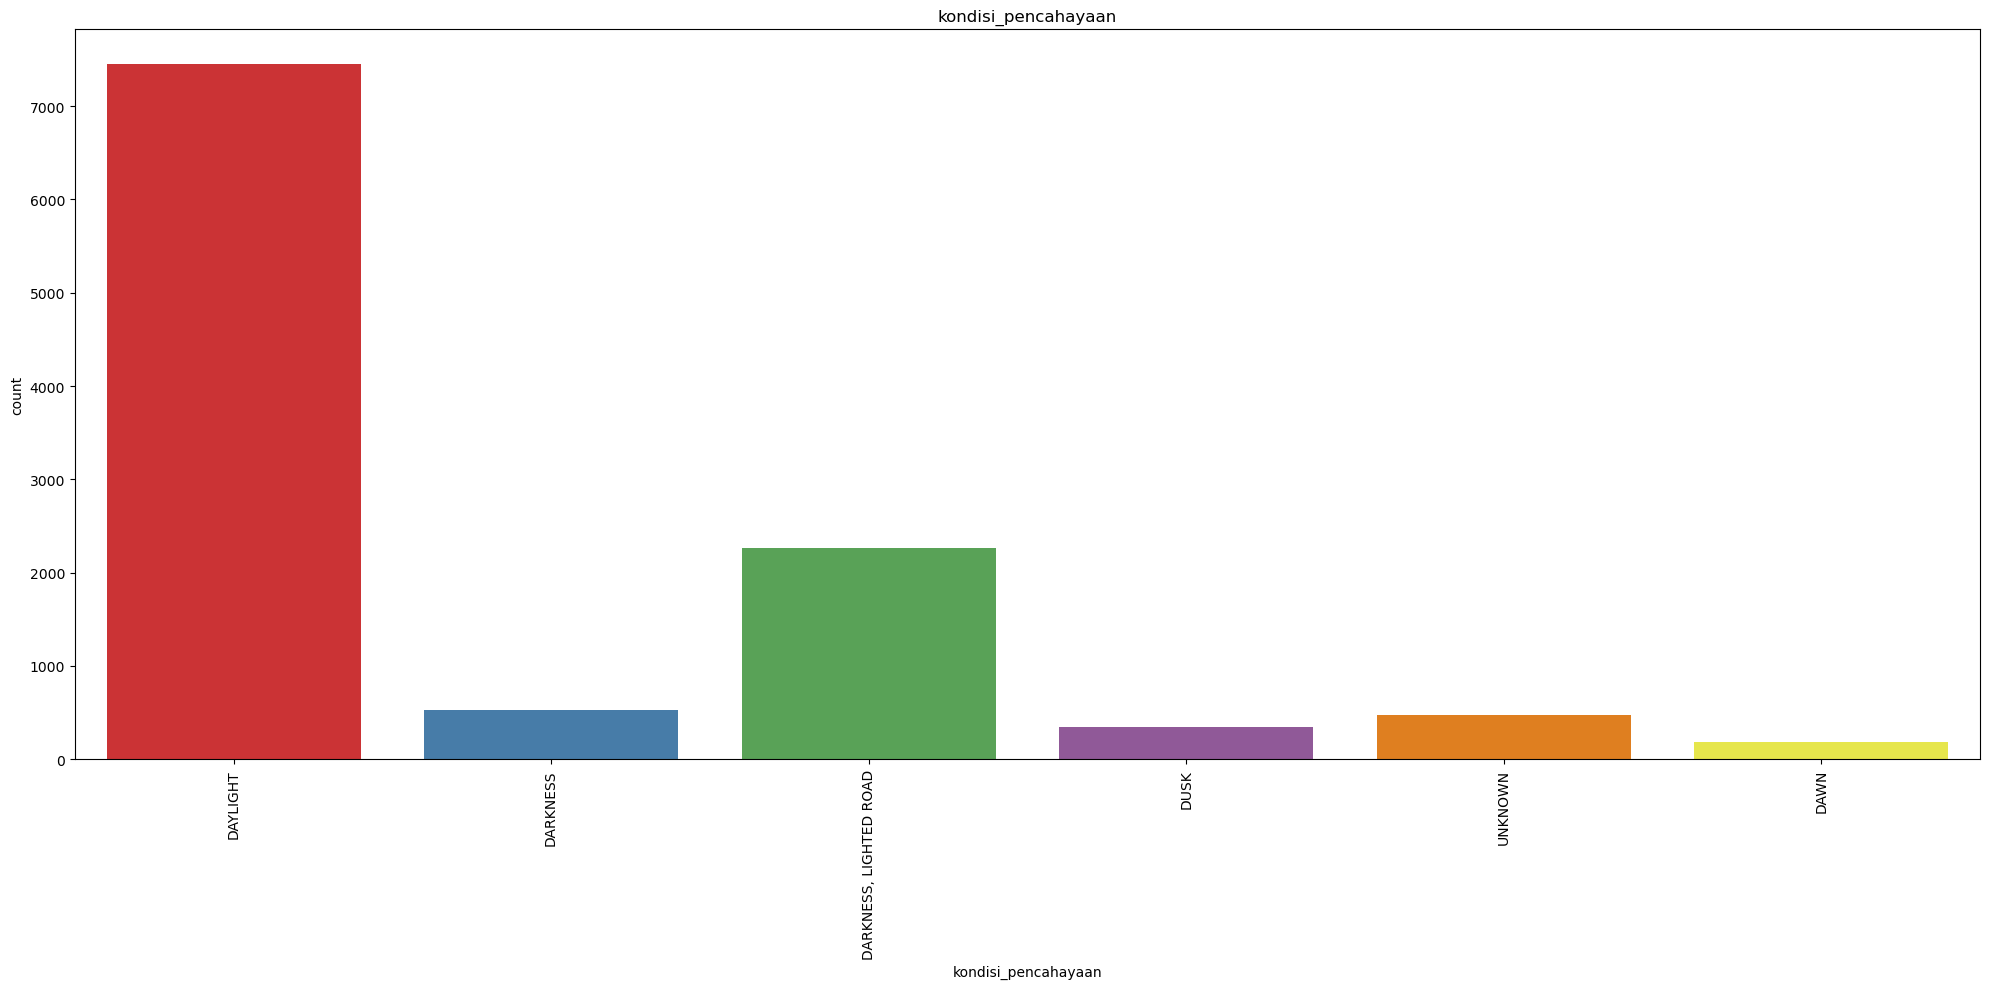

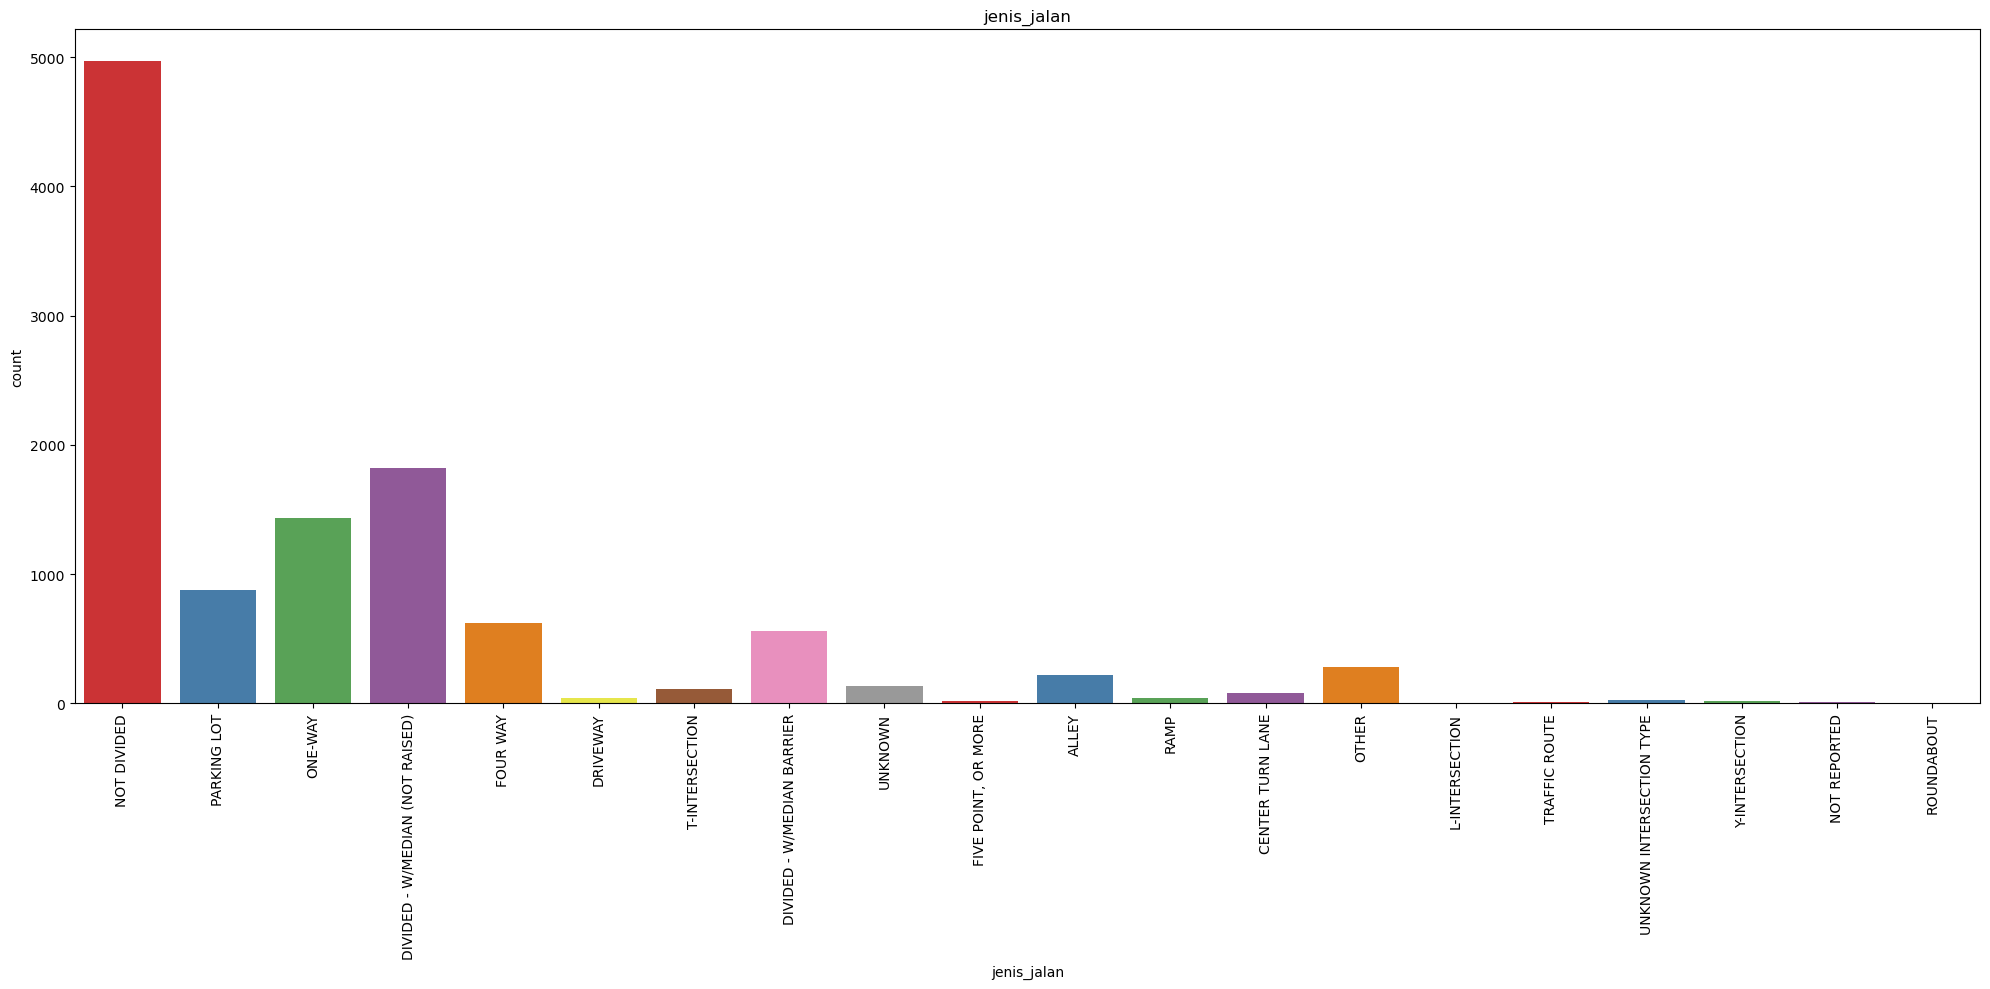

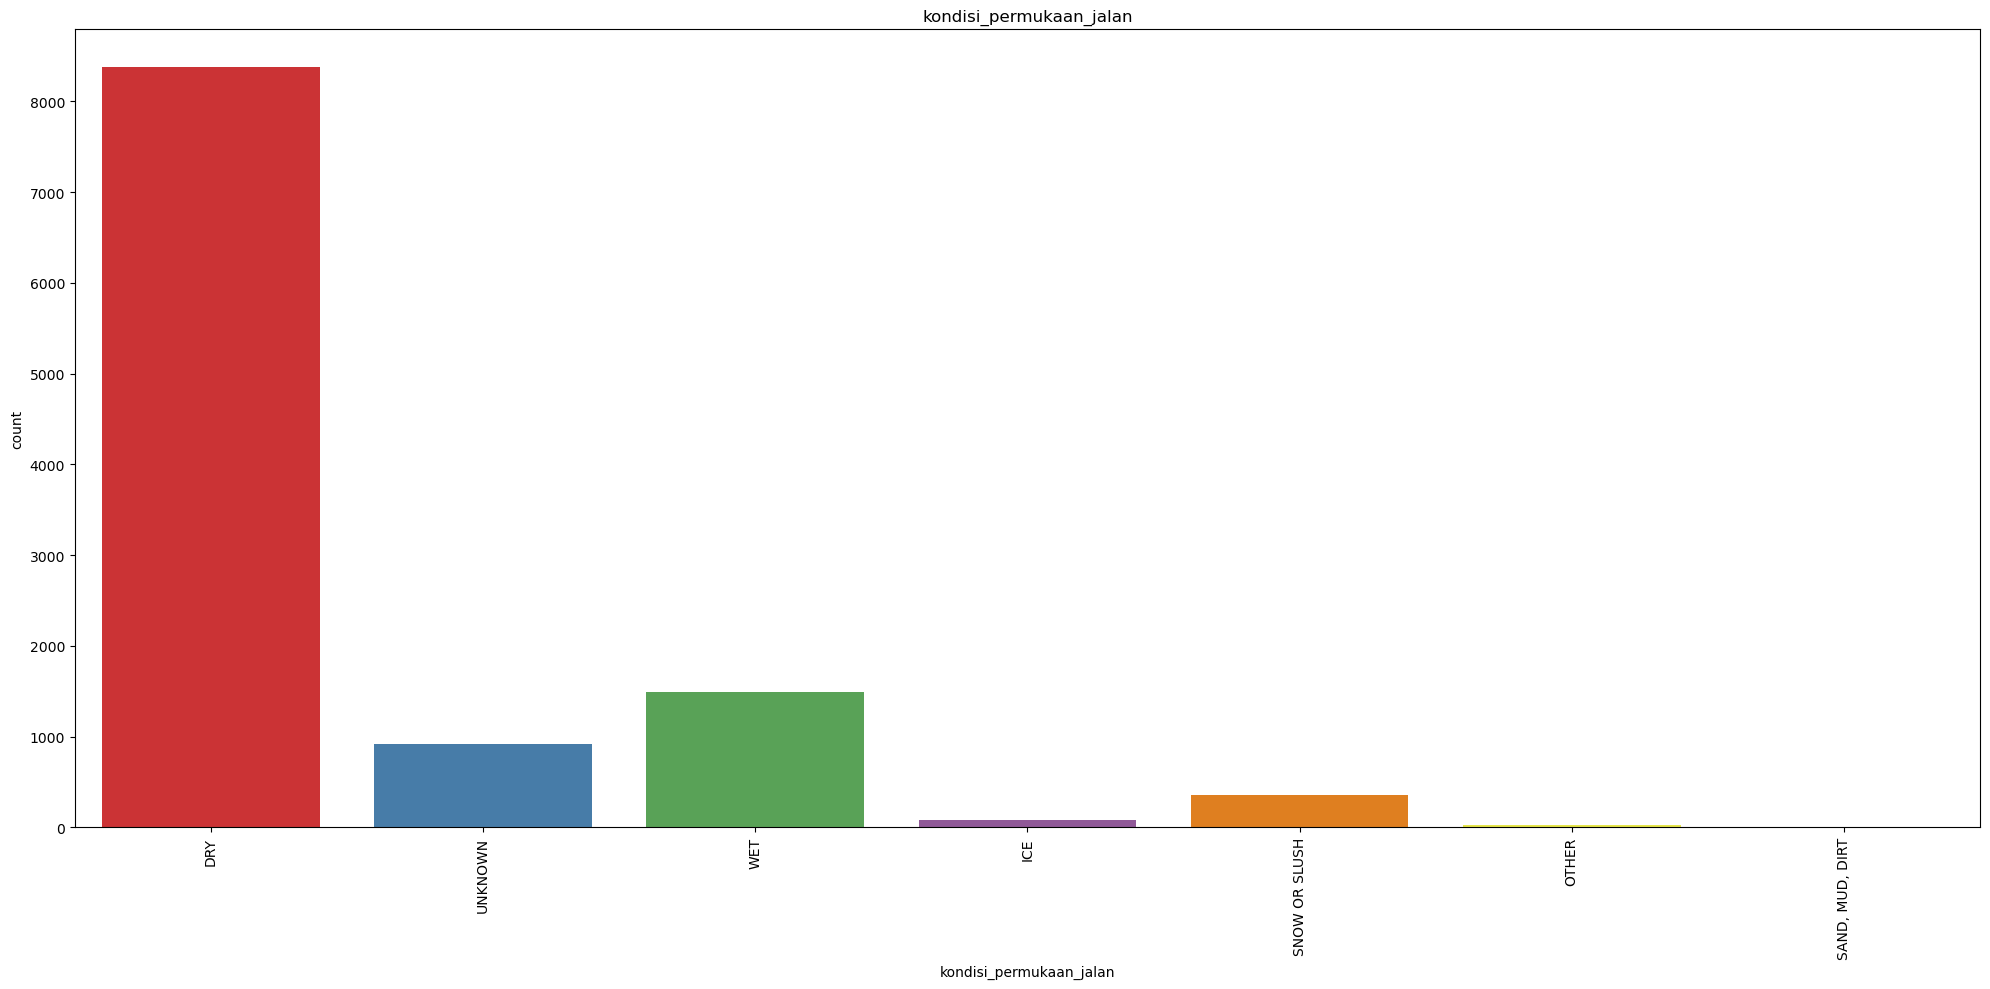

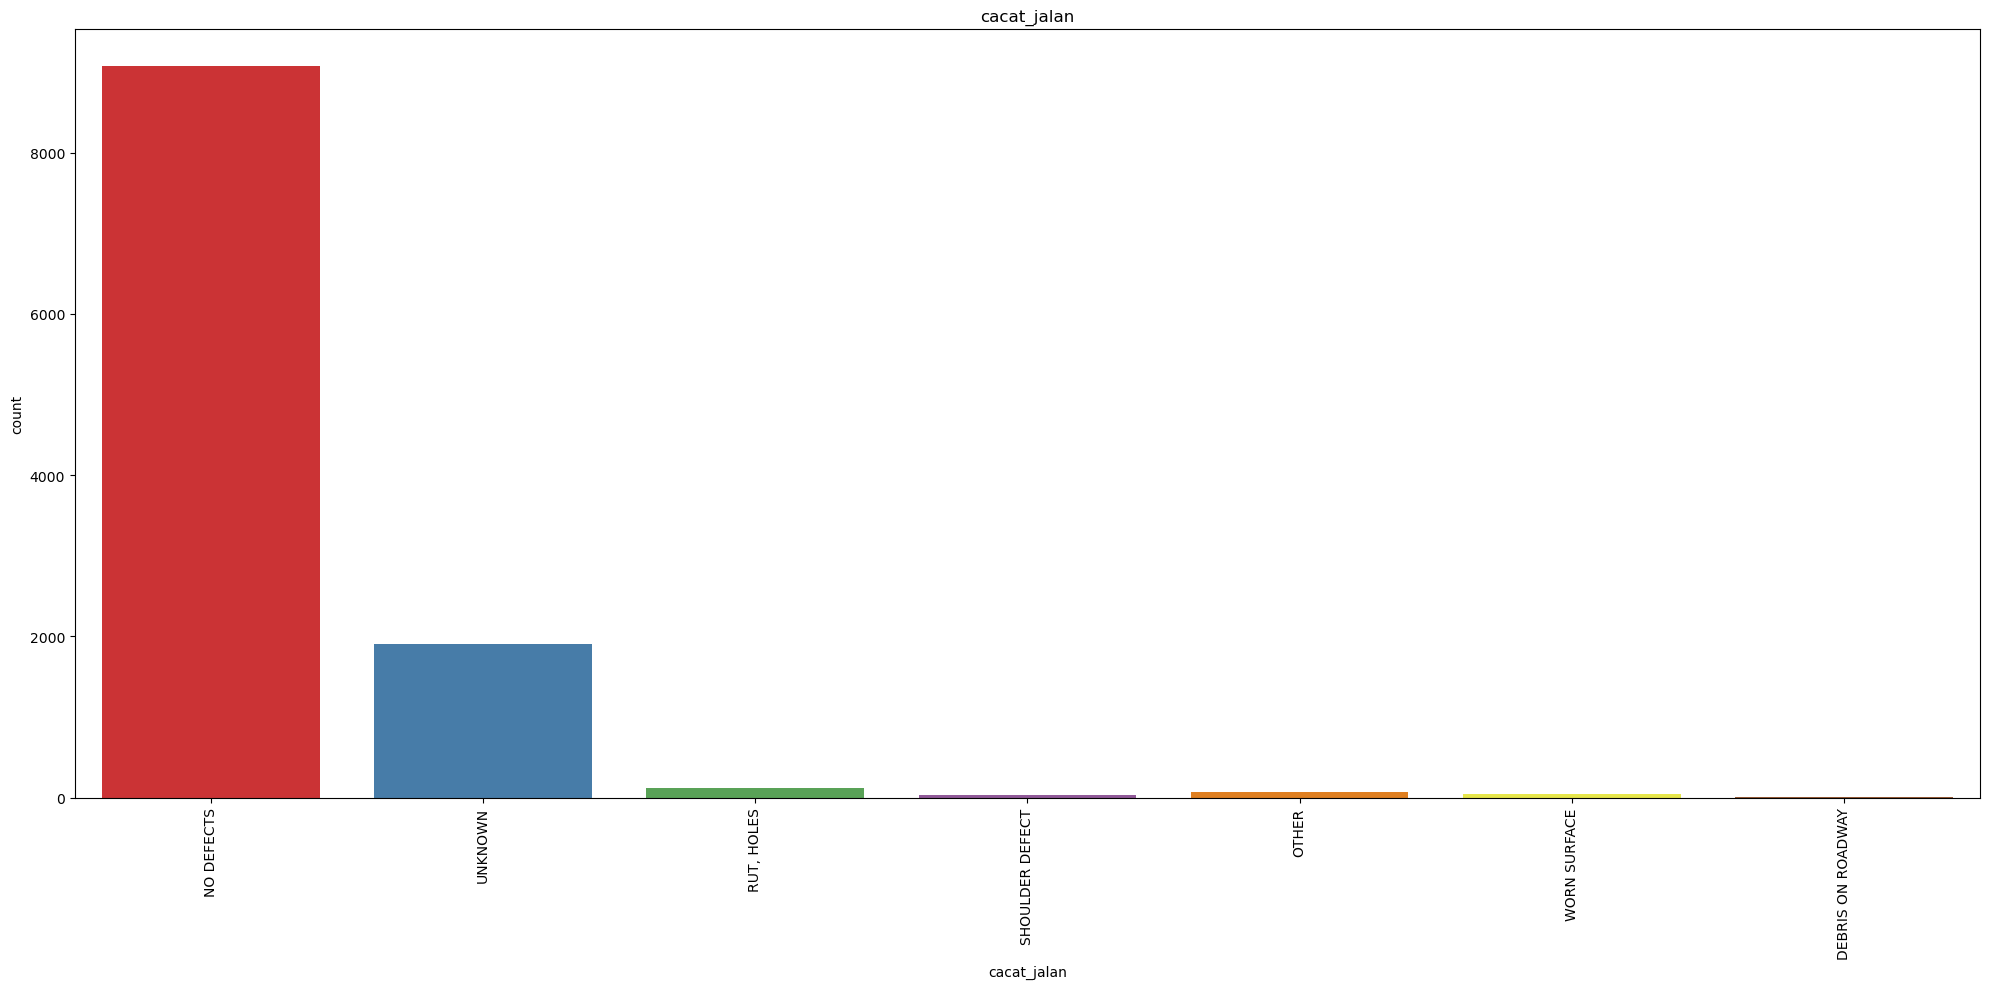

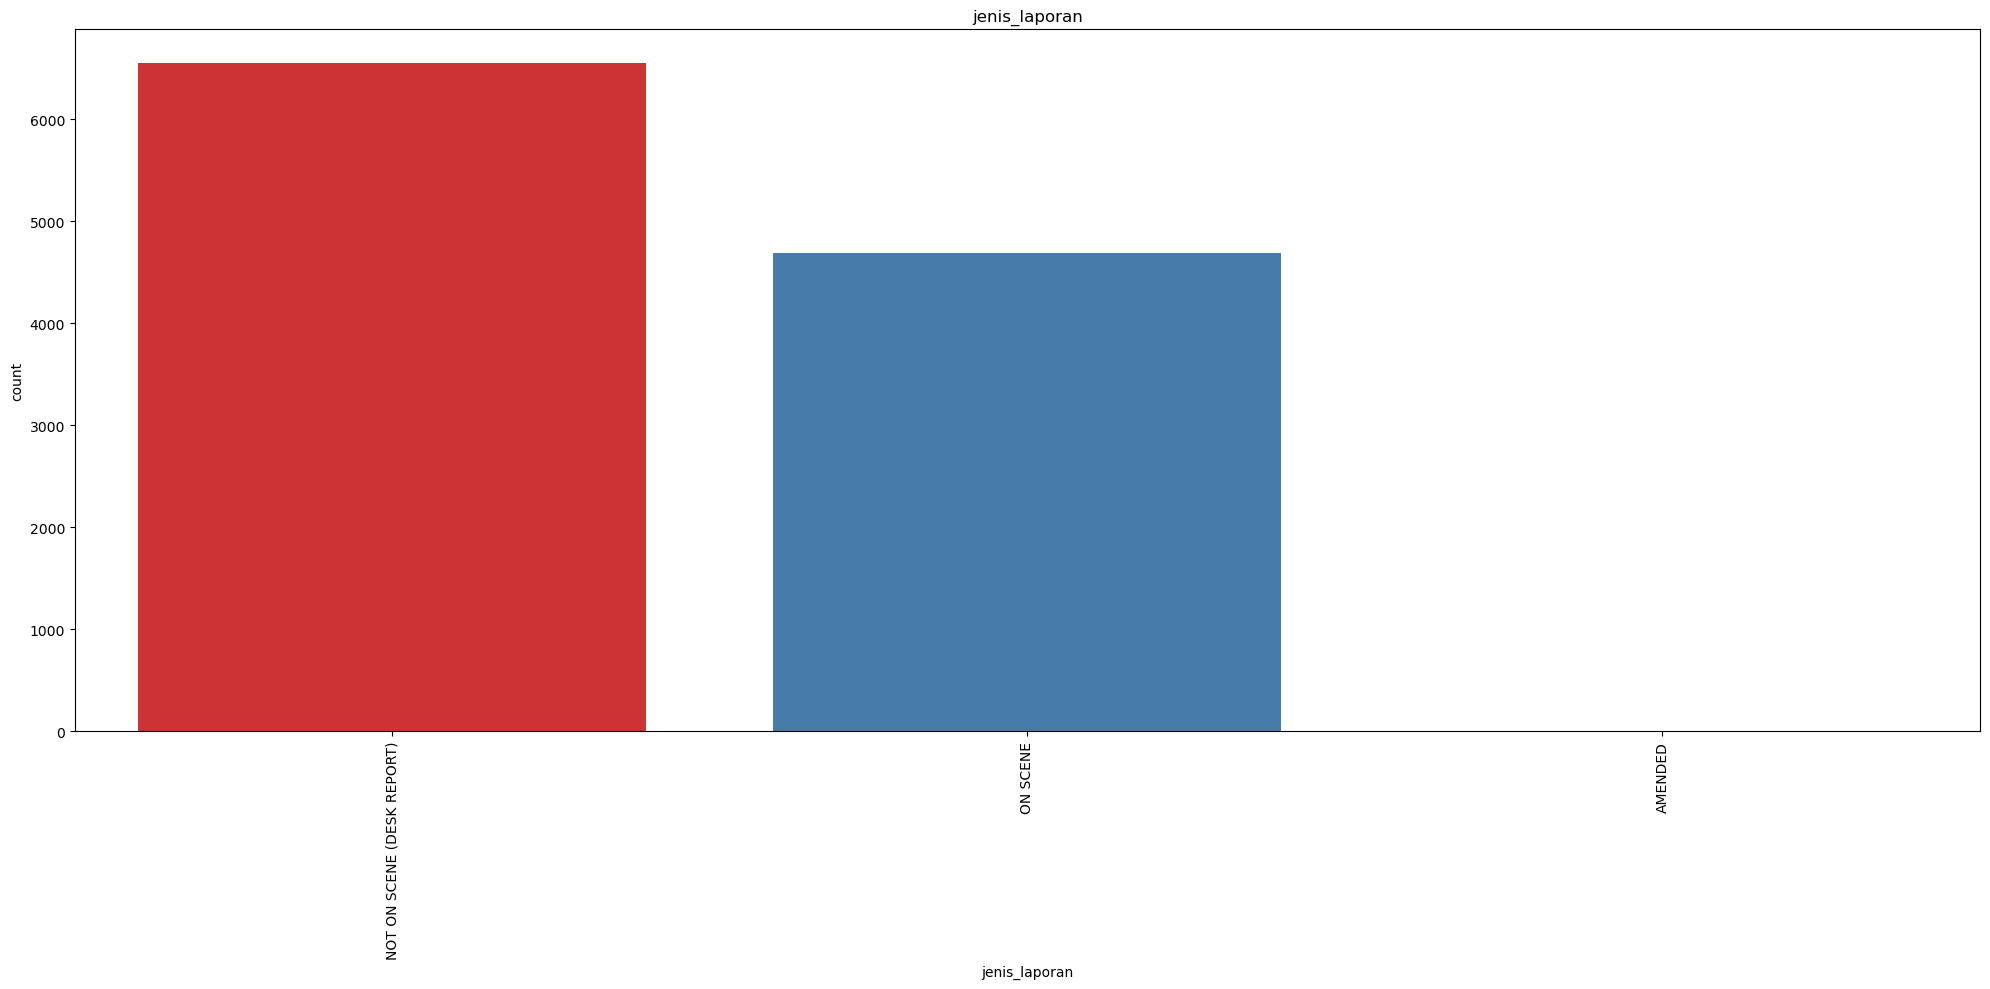

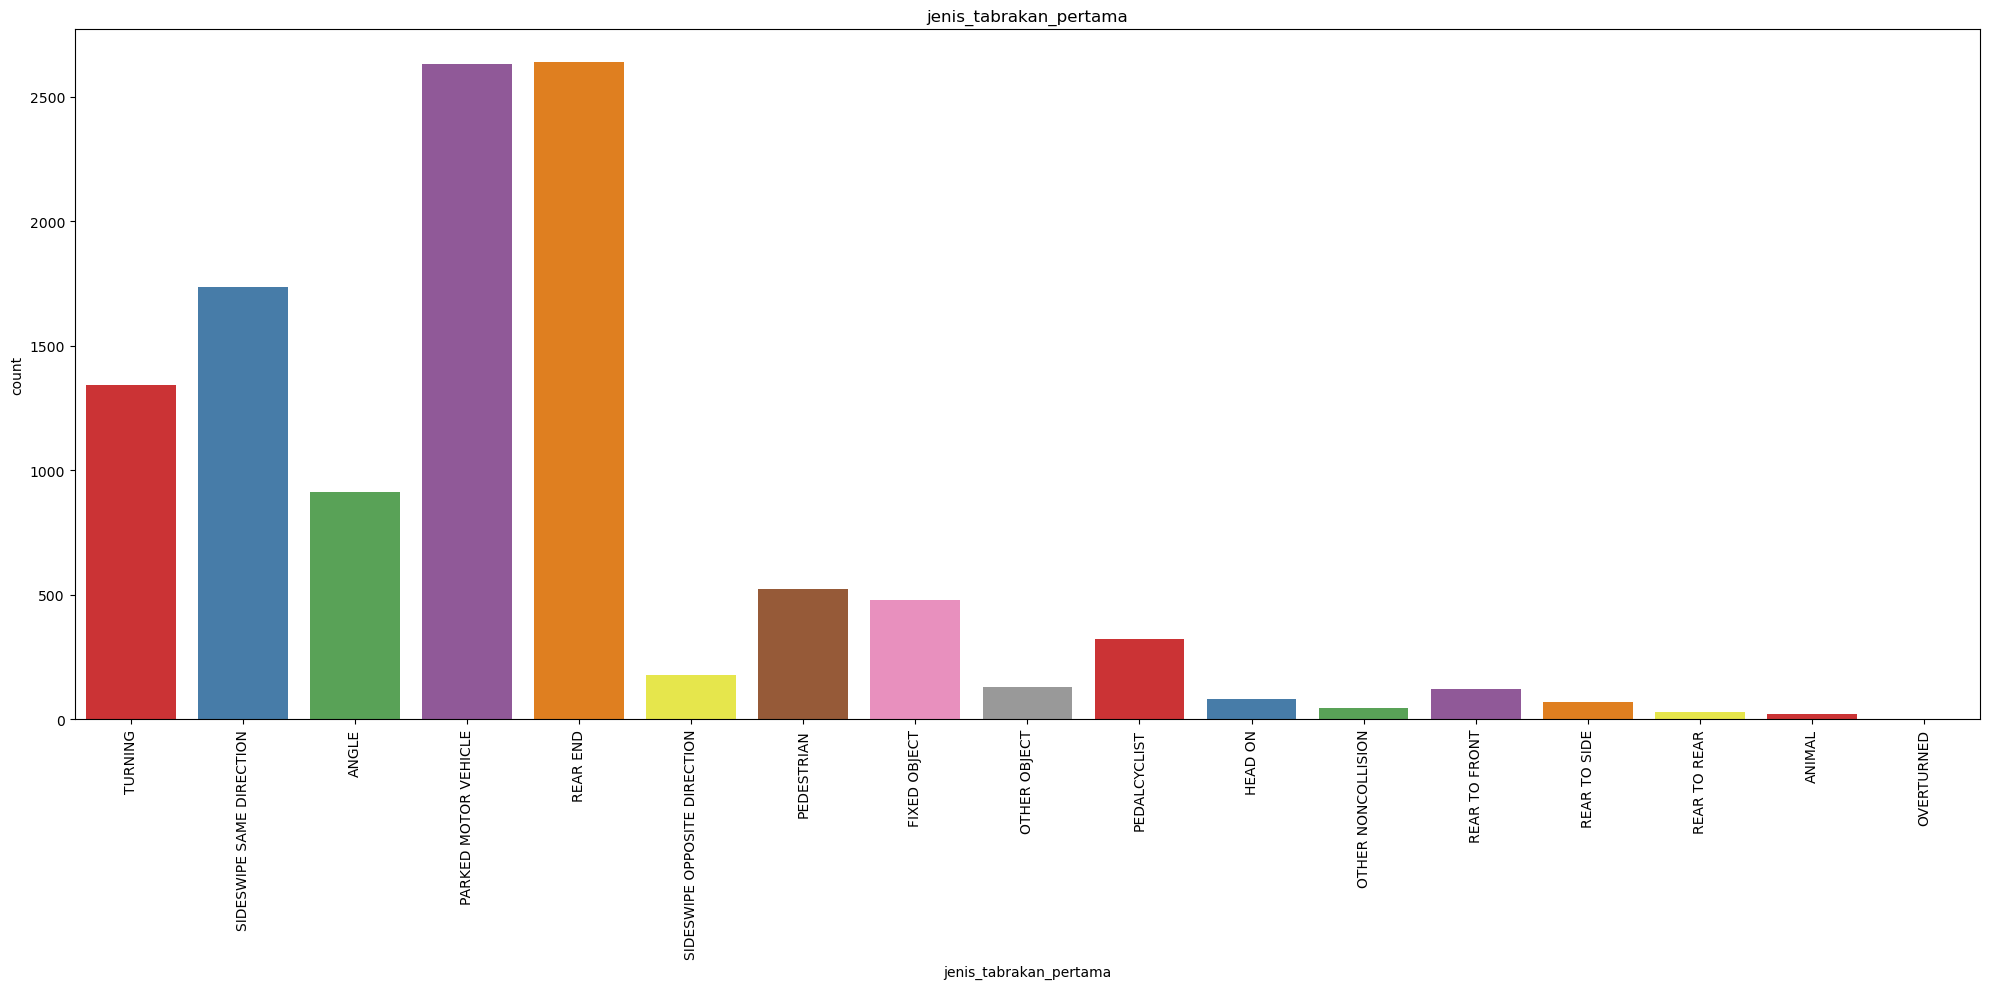

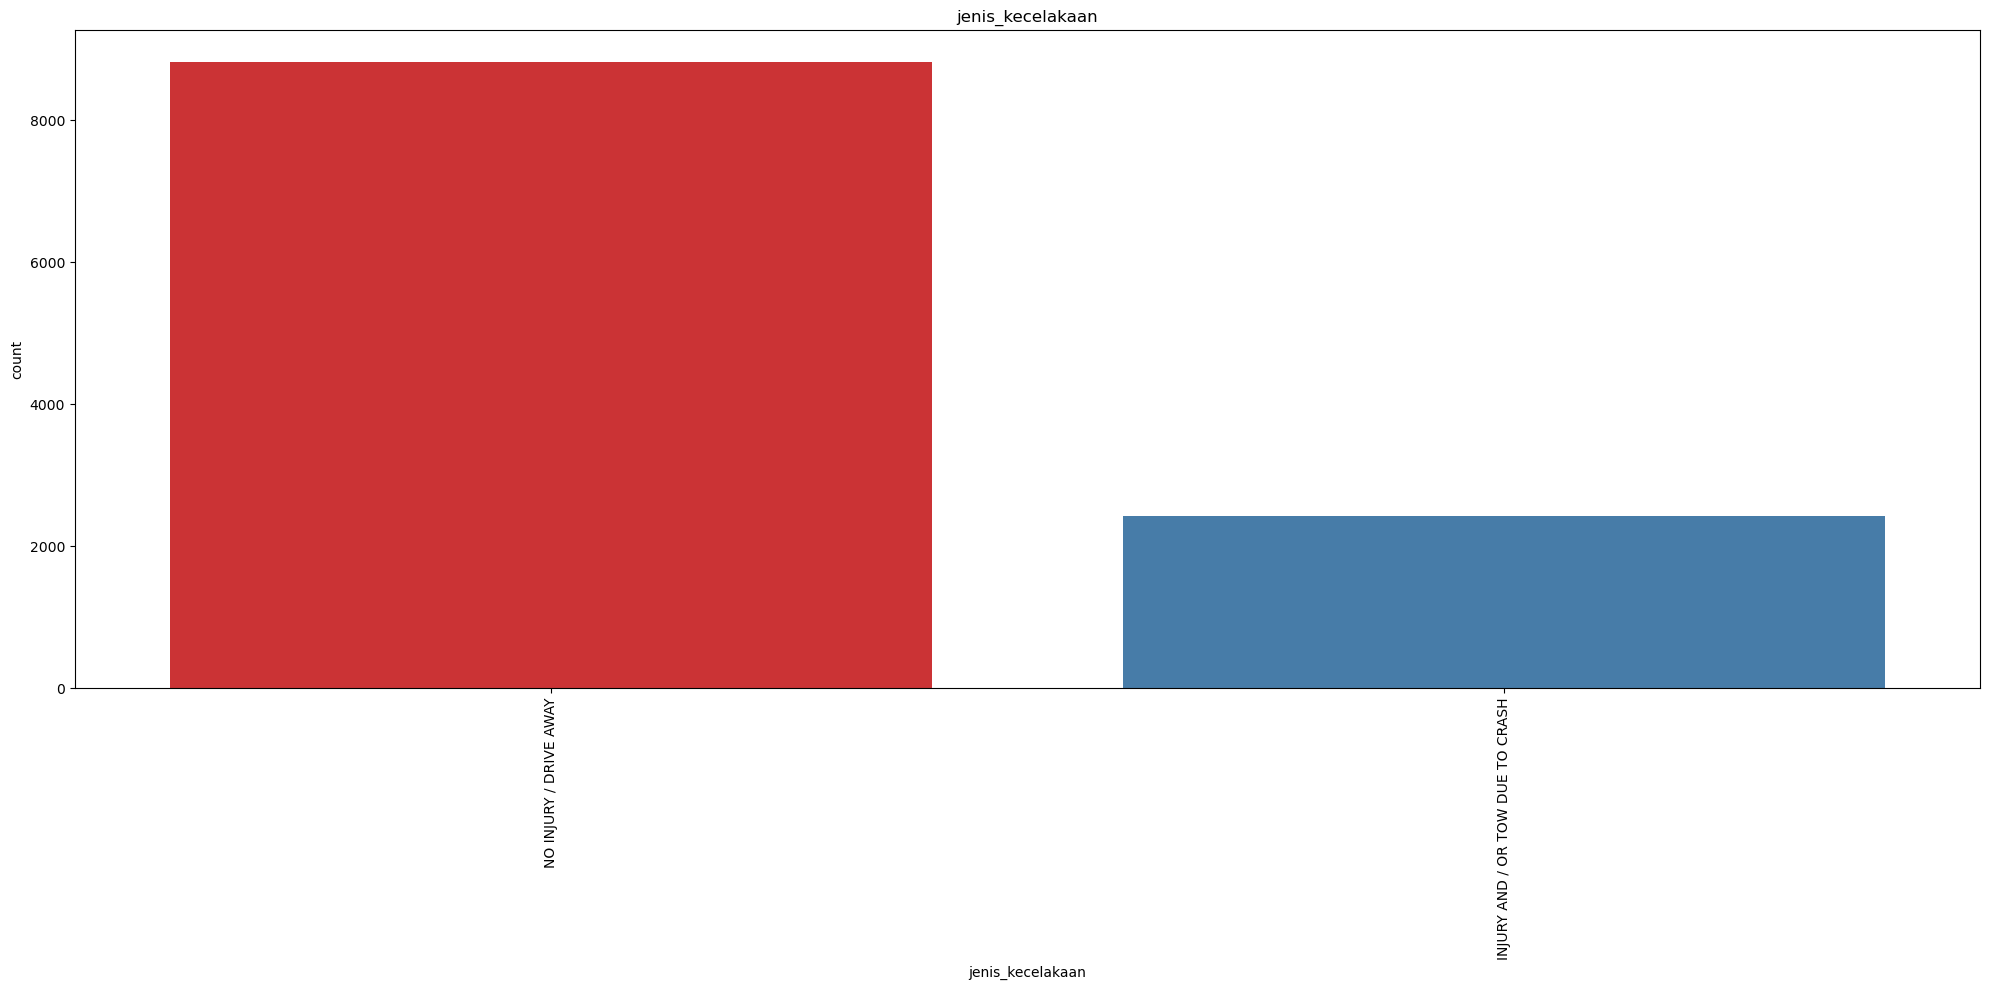

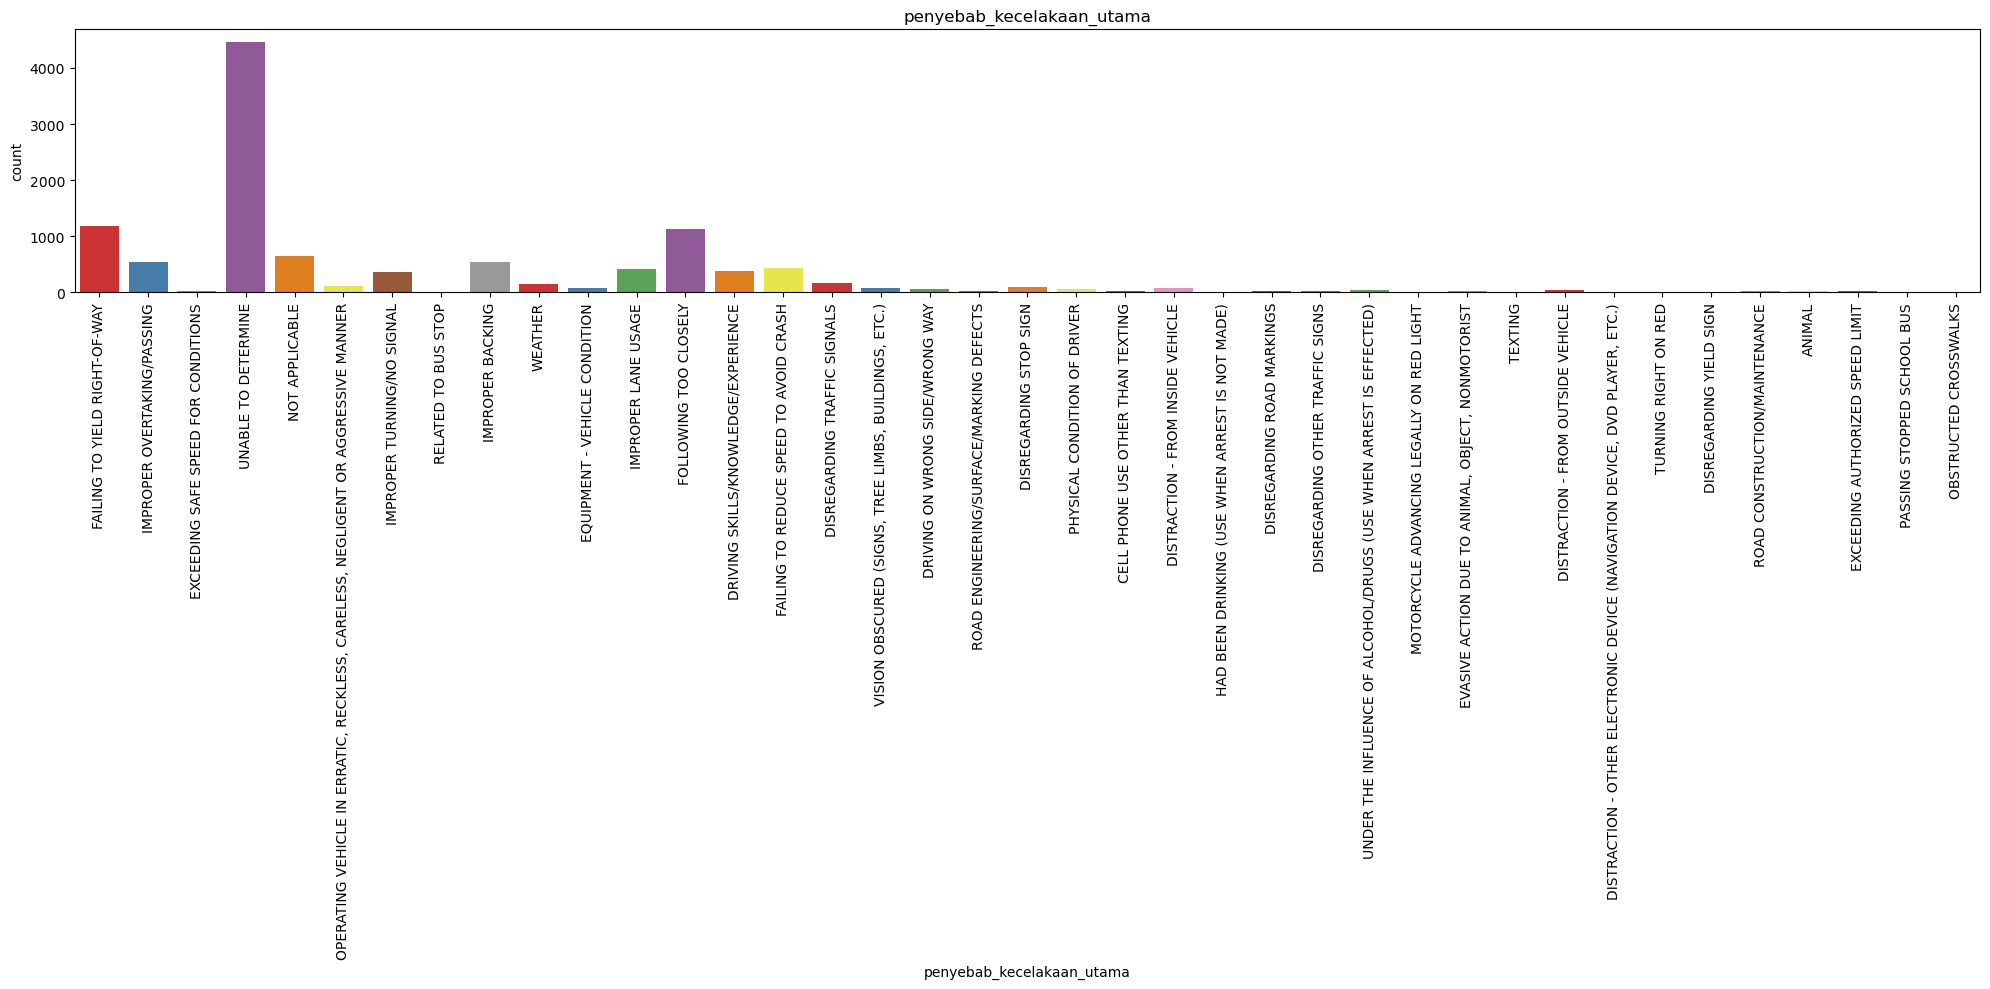

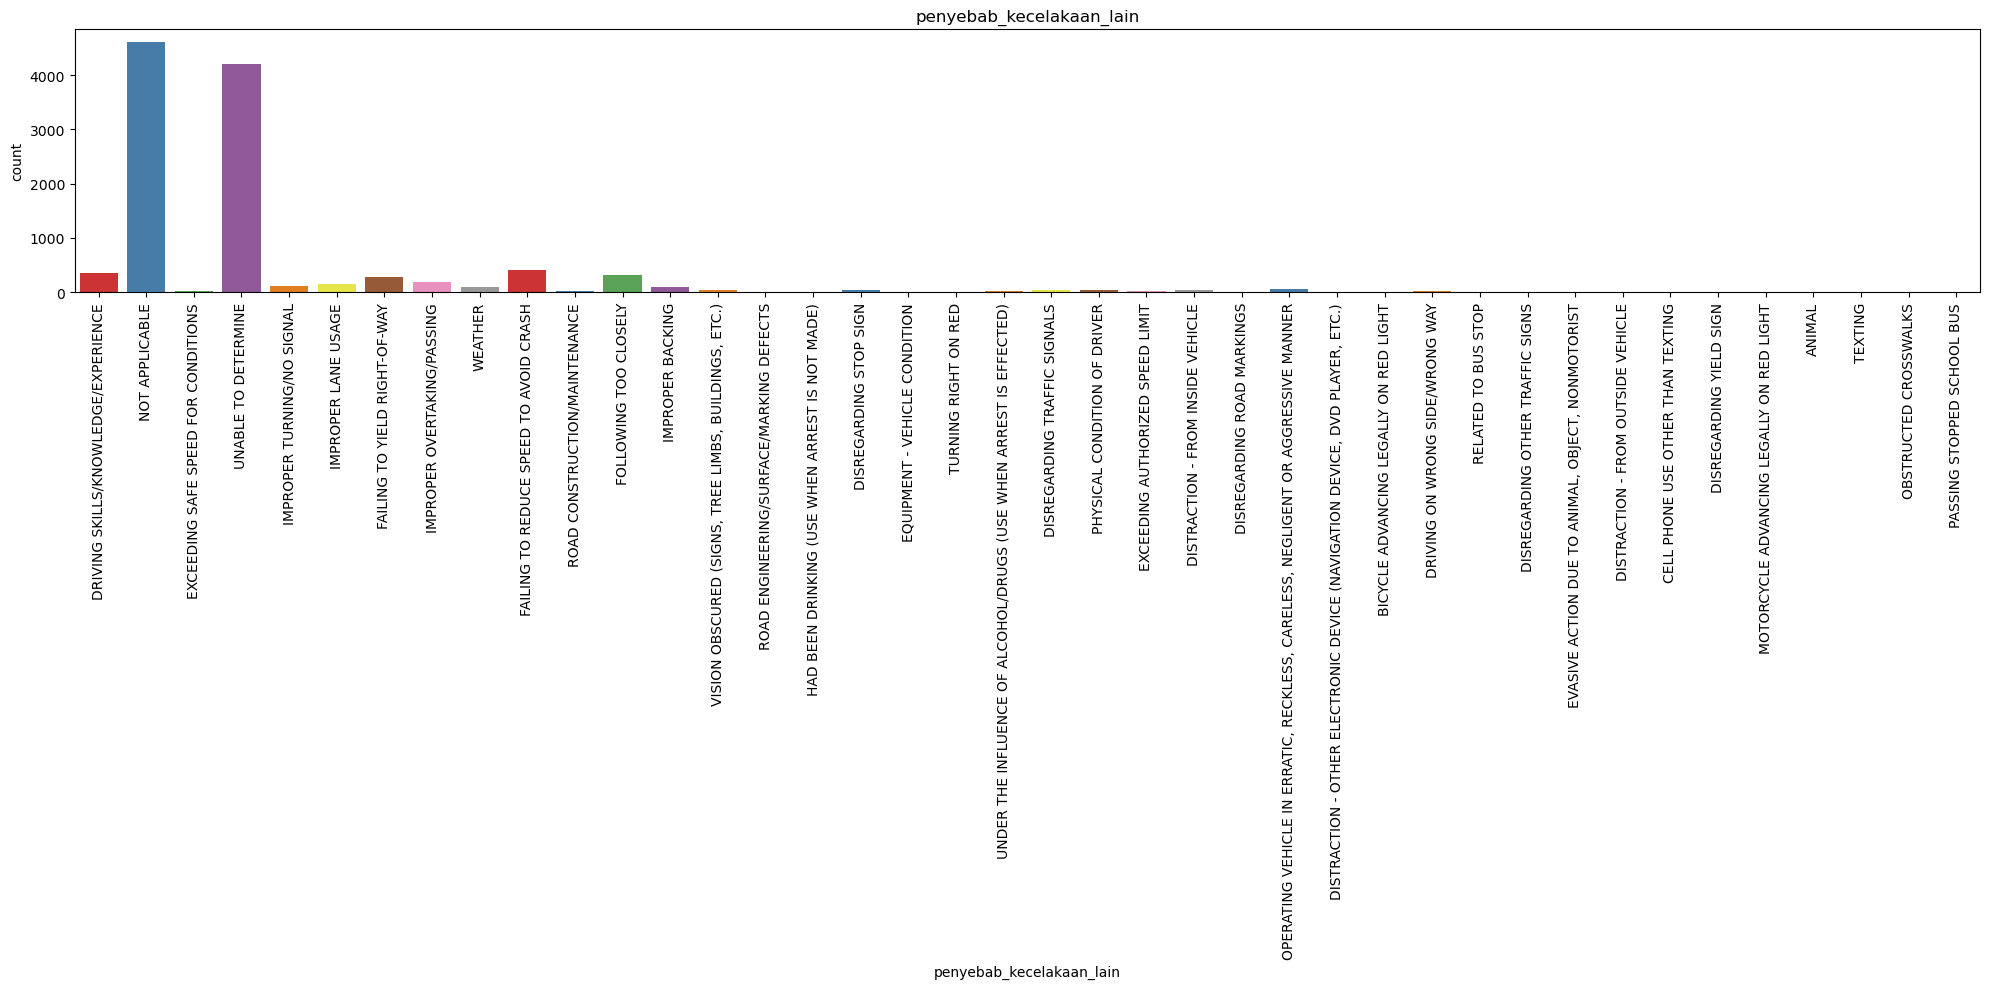

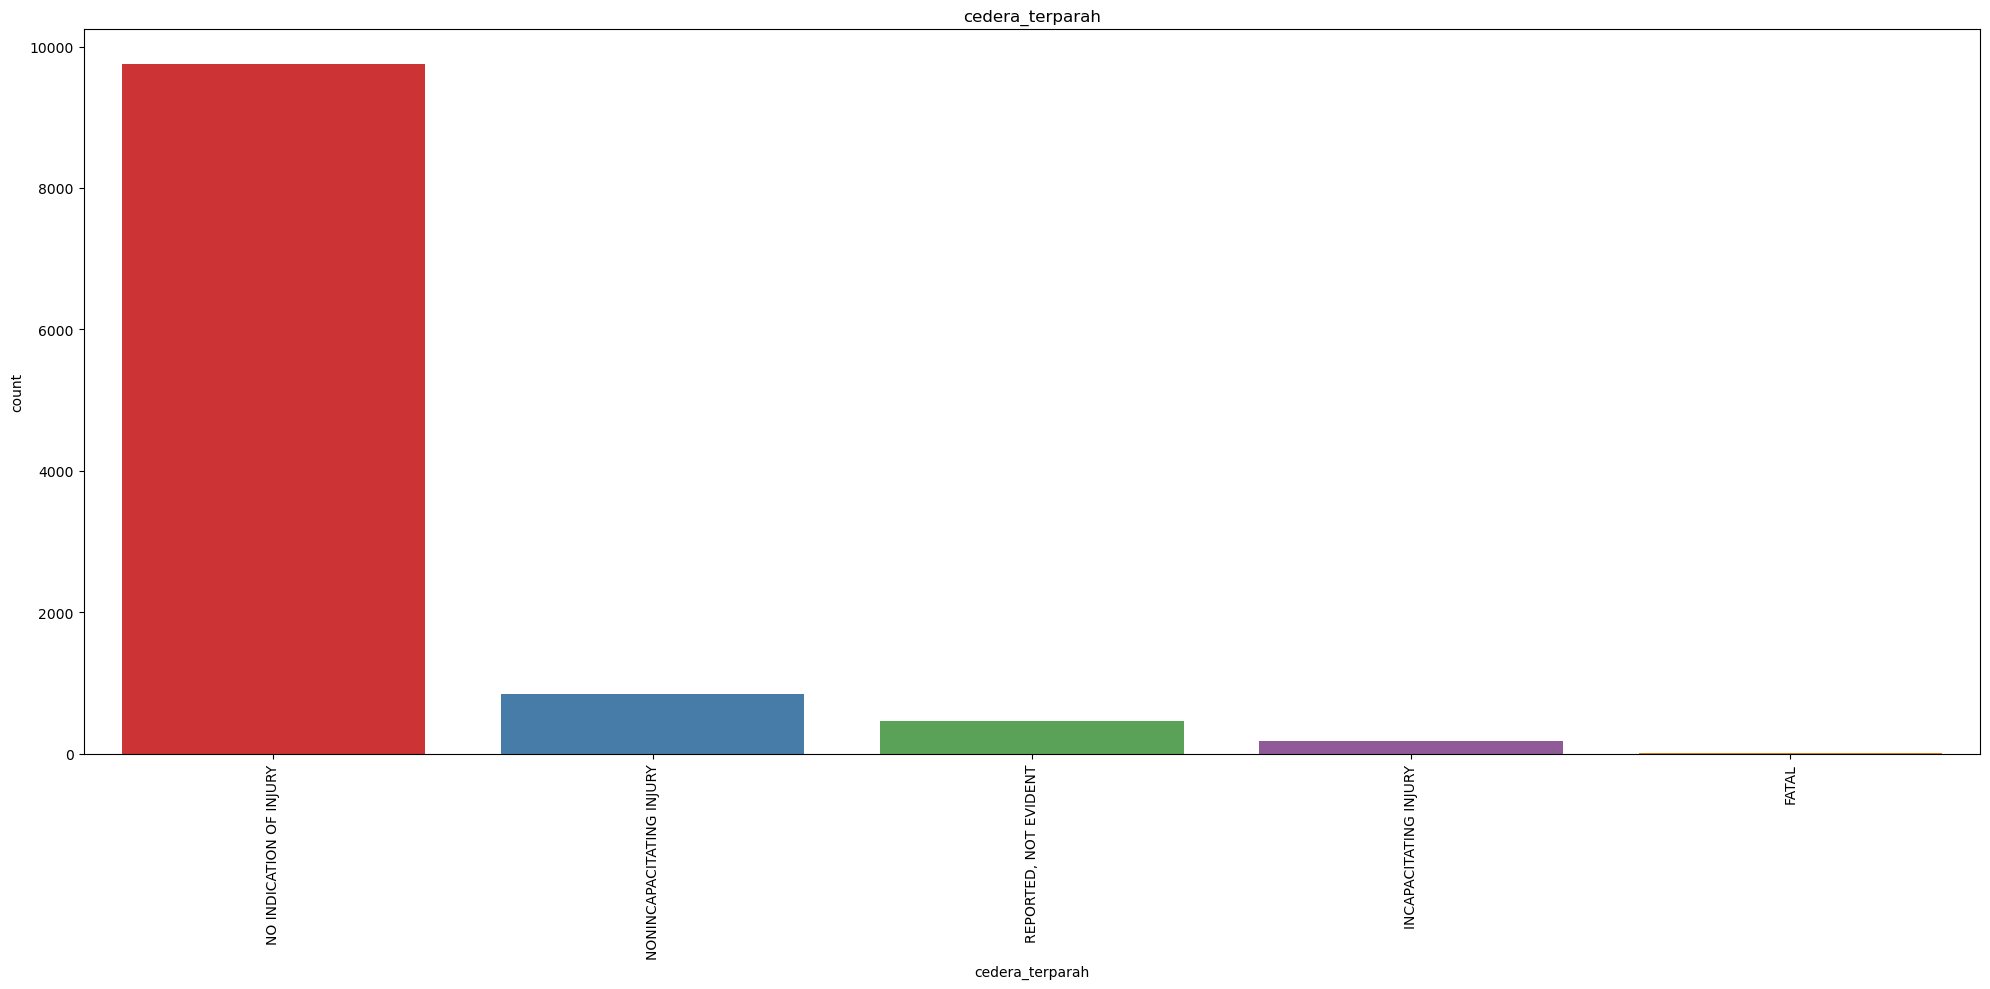

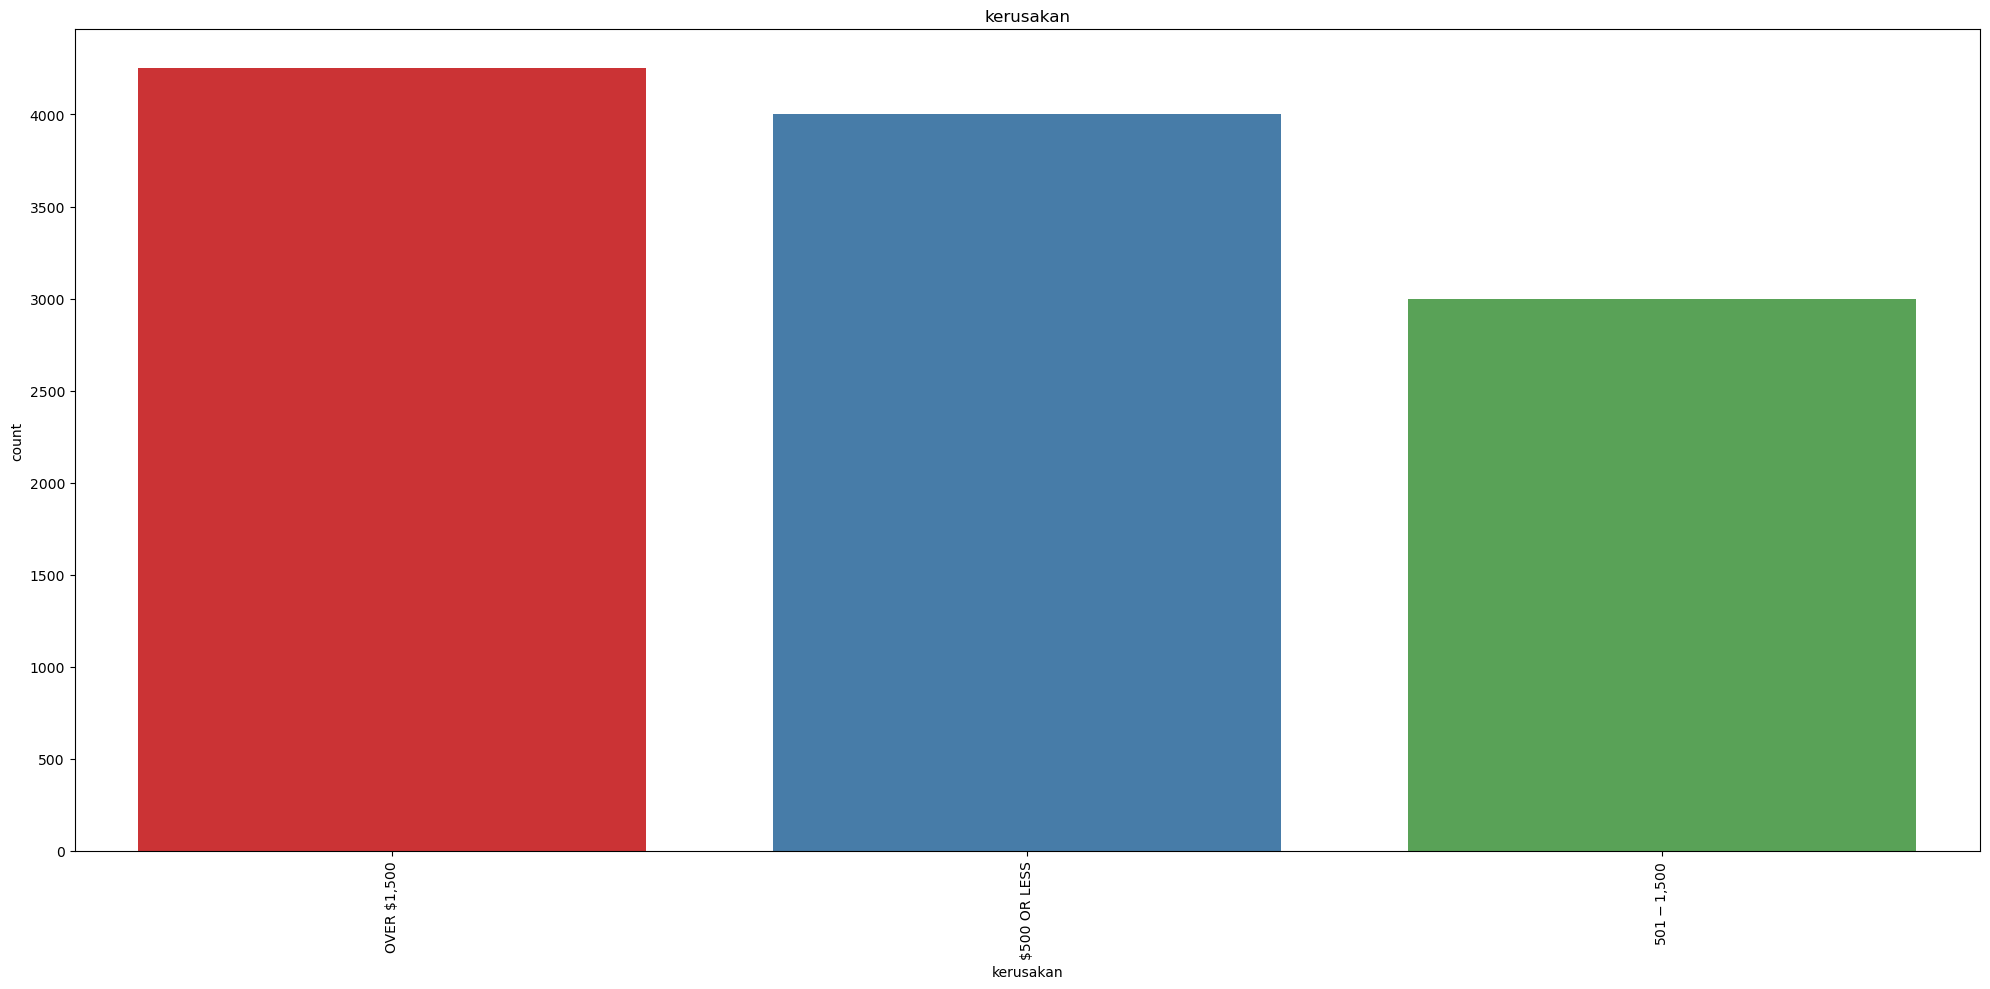

In [72]:
color_palette = sns.color_palette("Set1", len(cat_cols))
for i, column in enumerate(cat_cols, 1):
    if(column != 'tanggal_kecelakaan' and column != 'crash_record_id'):
        plt.figure(figsize=(20, 10))
        sns.countplot(data=df, x=column, palette=color_palette)
        plt.xticks(rotation=90)
        plt.title(column)
        plt.tight_layout()
        plt.show()

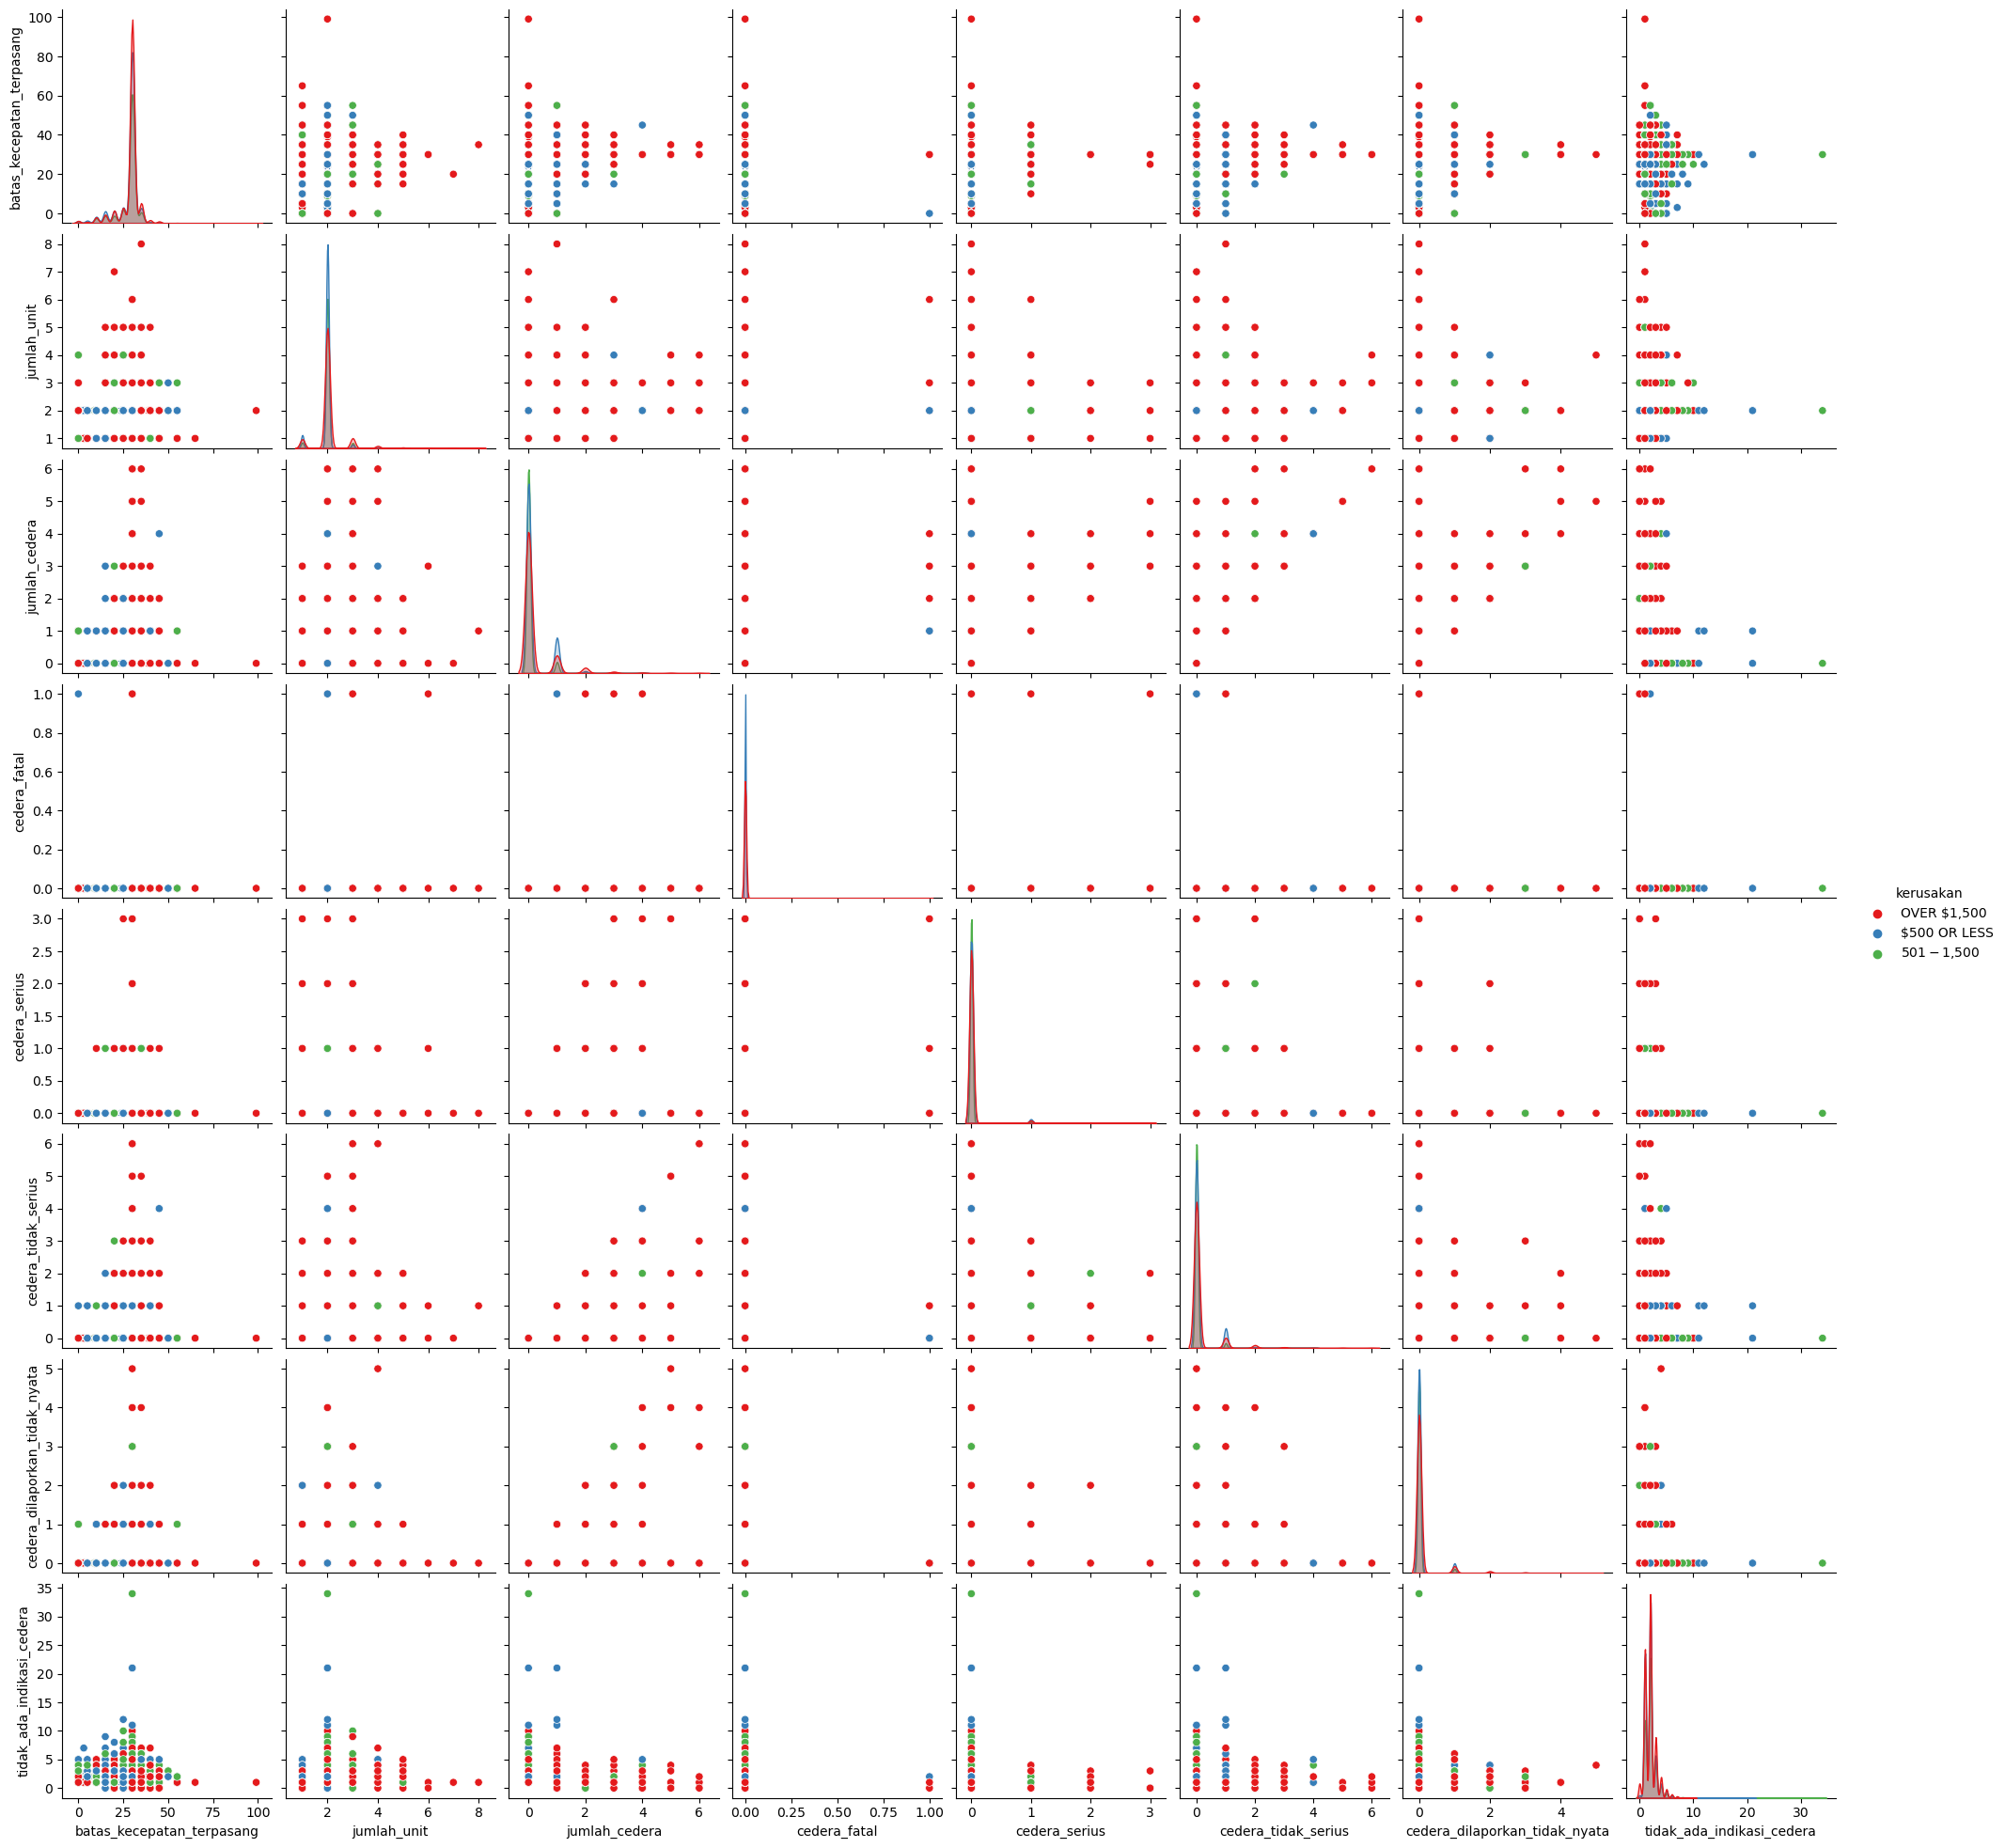

In [73]:
num_cols.remove('longitude')
num_cols.remove('latitude')
combined_df = pd.concat([df[num_cols], df['kerusakan']], axis=1)
sns.pairplot(combined_df, hue='kerusakan', palette='Set1')
plt.show()

### Data Pre-Processing

We can see that `crash_record_id` has no effect on the prediction because it is an identifier, since this we can drop this column

In [74]:
df.drop(labels='crash_record_id',axis=1,inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tanggal_kecelakaan             11250 non-null  object 
 1   longitude                      11250 non-null  float64
 2   latitude                       11250 non-null  float64
 3   batas_kecepatan_terpasang      11250 non-null  int64  
 4   kondisi_perangkat              11250 non-null  object 
 5   kondisi_cuaca                  11250 non-null  object 
 6   kondisi_pencahayaan            11250 non-null  object 
 7   jenis_jalan                    11250 non-null  object 
 8   kondisi_permukaan_jalan        11250 non-null  object 
 9   cacat_jalan                    11250 non-null  object 
 10  jenis_laporan                  11250 non-null  object 
 11  jenis_tabrakan_pertama         11250 non-null  object 
 12  jenis_kecelakaan               11250 non-null 

#### Convert Datetime Format from `tanggal_kecelakaan` to Integer - Timestamp

 Convert the datetime column to a pandas datetime object

In [76]:
df['tanggal_kecelakaan'] = pd.to_datetime(df['tanggal_kecelakaan'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tanggal_kecelakaan             11250 non-null  datetime64[ns]
 1   longitude                      11250 non-null  float64       
 2   latitude                       11250 non-null  float64       
 3   batas_kecepatan_terpasang      11250 non-null  int64         
 4   kondisi_perangkat              11250 non-null  object        
 5   kondisi_cuaca                  11250 non-null  object        
 6   kondisi_pencahayaan            11250 non-null  object        
 7   jenis_jalan                    11250 non-null  object        
 8   kondisi_permukaan_jalan        11250 non-null  object        
 9   cacat_jalan                    11250 non-null  object        
 10  jenis_laporan                  11250 non-null  object        
 11  jenis_tabrakan_

In [78]:
df['tanggal_kecelakaan'].head()

0   2018-06-01 16:35:00
1   2019-02-06 15:30:00
2   2017-06-17 22:05:00
3   2023-08-09 12:20:00
4   2023-09-17 16:19:00
Name: tanggal_kecelakaan, dtype: datetime64[ns]

Convert the datetime column to an integer then divide the resulting integer by the number of nanoseconds in a second

In [79]:
df['tanggal_kecelakaan'] = pd.to_datetime(df['tanggal_kecelakaan'])

# Memecah kolom menjadi tahun, bulan, tanggal, dan jam
df['tahun'] = df['tanggal_kecelakaan'].dt.year
df['bulan'] = df['tanggal_kecelakaan'].dt.month
df['tanggal'] = df['tanggal_kecelakaan'].dt.day
df['jam'] = df['tanggal_kecelakaan'].dt.hour


In [80]:
df.drop(labels='tanggal_kecelakaan',axis=1,inplace=True)

In [81]:
df.head()

,longitude,latitude,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,cacat_jalan,jenis_laporan,...,cedera_fatal,cedera_serius,cedera_tidak_serius,cedera_dilaporkan_tidak_nyata,tidak_ada_indikasi_cedera,kerusakan,tahun,bulan,tanggal,jam
0,-87.723019,41.785826,30,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,0.0,0.0,0.0,0.0,2.0,"OVER $1,500",2018,6,1,16
1,-87.678016,41.924513,30,NO CONTROLS,CLEAR,DARKNESS,NOT DIVIDED,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,0.0,0.0,0.0,0.0,2.0,$500 OR LESS,2019,2,6,15
2,-87.702085,41.946539,30,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKING LOT,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),...,0.0,0.0,0.0,0.0,2.0,"$501 - $1,500",2017,6,17,22
3,-87.659829,41.696878,35,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,0.0,0.0,0.0,0.0,2.0,$500 OR LESS,2023,8,9,12
4,-87.774777,41.971278,20,NO CONTROLS,CLEAR,DAYLIGHT,ONE-WAY,DRY,NO DEFECTS,ON SCENE,...,0.0,0.0,0.0,0.0,1.0,"OVER $1,500",2023,9,17,16


In [82]:
df.drop(labels=['longitude','latitude'],axis=1,inplace=True)

In [48]:
NaNPhrase= {
    'kondisi_perangkat': ['UNKNOWN', 'NO CONTROLS', 'MISSING', 'OTHER'],
    'kondisi_cuaca': ['UNKNOWN', 'OTHER'],
    'kondisi_pencahayaan': ['UNKNOWN'],
    'jenis_jalan': ['UNKNOWN', 'NOT REPORTED', 'UNKNOWN INTERSECTION TYPE', 'OTHER'],
    'kondisi_permukaan_jalan': ['UNKNOWN', 'OTHER'],
    'cacat_jalan': ['UNKNOWN', 'OTHER'],
    'jenis_laporan': [],
    'jenis_tabrakan_pertama': ['OTHER OBJECT', 'OTHER NONCOLLISION'],
    'jenis_kecelakaan': [],
    'penyebab_kecelakaan_utama': ['UNABLE TO DETERMINE', 'NOT APPLICABLE'],
    'penyebab_kecelakaan_lain': ['UNABLE TO DETERMINE', 'NOT APPLICABLE'],
    'cedera_terparah': [],
    'kerusakan': []
}

In [49]:
for col, phrases in NaNPhrase.items():
        if col in df.columns:
            # Mengganti nilai-nilai yang sesuai dengan NaNPhrase menjadi NaN
            df[col] = df[col].replace(phrases, pd.NA)
            # Mengisi NaN dengan mode dari kolom tersebut
            mode = df[col].mode()[0] if not df[col].mode().empty else None
            if mode is not None:
                df[col] = df[col].fillna(mode)

In [94]:
df.isna().sum()

batas_kecepatan_terpasang        0
kondisi_perangkat                0
kondisi_cuaca                    0
kondisi_pencahayaan              0
jenis_jalan                      0
kondisi_permukaan_jalan          0
cacat_jalan                      0
jenis_laporan                    0
jenis_tabrakan_pertama           0
jenis_kecelakaan                 0
jumlah_unit                      0
penyebab_kecelakaan_utama        0
penyebab_kecelakaan_lain         0
cedera_terparah                  0
jumlah_cedera                    0
cedera_fatal                     0
cedera_serius                    0
cedera_tidak_serius              0
cedera_dilaporkan_tidak_nyata    0
tidak_ada_indikasi_cedera        0
kerusakan                        0
tahun                            0
bulan                            0
tanggal                          0
jam                              0
dtype: int64

### Modelling

In [83]:

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import optuna

In [84]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Salin DataFrame
train = df.copy()

# Pisahkan fitur dan target
X = train.drop(['kerusakan'], axis=1)
y = train['kerusakan']

# Inisialisasi LabelEncoder
le_y = LabelEncoder()

# Terapkan label encoding pada y
y_encoded = le_y.fit_transform(y)

# Tentukan random state dan kfold
random_state = 42
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Sekarang X dan y_encoded siap digunakan untuk pelatihan model

In [85]:
label_encoders = {}

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Terapkan transformasi Z-score pada X
X_scaled = scaler.fit_transform(X)

# Jika ingin hasil dalam bentuk DataFrame agar kolom tetap sama seperti X
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,cacat_jalan,jenis_laporan,jenis_tabrakan_pertama,jenis_kecelakaan,...,jumlah_cedera,cedera_fatal,cedera_serius,cedera_tidak_serius,cedera_dilaporkan_tidak_nyata,tidak_ada_indikasi_cedera,tahun,bulan,tanggal,jam
0,0.292989,0.355457,-0.459120,0.396917,0.189724,-0.570599,-0.476948,-0.844460,1.382639,0.52434,...,-0.341099,-0.021087,-0.122528,-0.254169,-0.195371,0.030133,-0.729823,-0.243702,-1.649791,0.480768
1,0.292989,0.355457,-0.459120,-2.287103,0.189724,-0.570599,-0.476948,-0.844460,1.170580,0.52434,...,-0.341099,-0.021087,-0.122528,-0.254169,-0.195371,0.030133,-0.272642,-1.420500,-1.080147,0.294044
2,0.292989,2.594057,2.892421,-1.392429,1.323232,1.555822,2.137262,-0.844460,-2.010294,0.52434,...,-0.341099,-0.021087,-0.122528,-0.254169,-0.195371,0.030133,-1.187004,-0.243702,0.173071,1.601112
3,1.091355,0.355457,-0.459120,0.396917,0.189724,-0.570599,-0.476948,-0.844460,1.170580,0.52434,...,-0.341099,-0.021087,-0.122528,-0.254169,-0.195371,0.030133,1.556081,0.344697,-0.738360,-0.266127
4,-1.303741,0.355457,-0.459120,0.396917,0.756478,-0.570599,-0.476948,1.181596,-0.525886,0.52434,...,-0.341099,-0.021087,-0.122528,-0.254169,-0.195371,-0.857300,1.556081,0.638897,0.173071,0.480768


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_encoded, test_size=0.2, 
                                                    stratify=y_encoded, random_state=random_state)

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Inisialisasi model
classifiers = []
classifiers.append(KNeighborsClassifier(n_neighbors=5))
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='error'))
classifiers.append(CatBoostClassifier(random_state=random_state, verbose=0))  # Menambahkan CatBoostClassifier

# Evaluasi model menggunakan F1 score
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring="f1_weighted", cv=kfold, n_jobs=4))

# Menghitung rata-rata dan deviasi standar dari hasil cross-validation
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

# Membuat DataFrame untuk hasil
cv_res = pd.DataFrame({
    "CrossValMeans": cv_means,
    "CrossValerrors": cv_std,
    "Algorithm": ["KNN", "GaussianNB", "Decision Tree", "Random Forest", "XGBoost", "CatBoost"]
})

# Mengurutkan berdasarkan nilai rata-rata F1 score
cv_res = cv_res.sort_values(by='CrossValMeans', ascending=False)

# Menampilkan hasil
cv_res


,CrossValMeans,CrossValerrors,Algorithm
5,0.487100,0.002626,CatBoost
4,0.483944,0.006883,XGBoost
3,0.481859,0.007110,Random Forest
2,0.432165,0.004072,Decision Tree
1,0.221878,0.018148,GaussianNB
0,NaN,NaN,KNN


In [89]:
for i, classifier in enumerate(classifiers):
    print(f"F1 Scores for {cv_res['Algorithm'][i]}: {cv_results[i]}")

F1 Scores for KNN: [nan nan nan nan nan]
F1 Scores for GaussianNB: [0.2146641  0.20935011 0.21296296 0.21443599 0.25797462]
F1 Scores for Decision Tree: [0.43328117 0.42571223 0.4306717  0.43289106 0.4382681 ]
F1 Scores for Random Forest: [0.49102969 0.48568331 0.46947577 0.48105    0.48205419]
F1 Scores for XGBoost: [0.48306659 0.47887248 0.49663328 0.48422405 0.47692128]
F1 Scores for CatBoost: [0.48518683 0.48353858 0.48687868 0.4889857  0.4909118 ]


In [95]:

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    depth = trial.suggest_int('depth', 3, 10)  # Kedalaman maksimum pohon
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 1, 10)  # Parameter regularisasi
    iterations = trial.suggest_int('iterations', 50, 300)  # Total jumlah pohon

    # Inisialisasi model CatBoost
    clf = CatBoostClassifier(
        iterations=iterations,
        depth=depth,
        learning_rate=learning_rate,
        l2_leaf_reg=l2_leaf_reg,
        random_seed=random_state,
        verbose=0  # Nonaktifkan output CatBoost selama pelatihan
    )

    # Hitung skor cross-validation menggunakan F1 Score
    try:
        score = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_weighted').mean()
    except Exception as e:
        print(f"Error during cross-validation: {e}")
        return np.nan  # Kembalikan NaN jika terjadi kesalahan

    return score


In [96]:

study = optuna.create_study(direction='maximize')  # Atau 'minimize' tergantung metrik
study.optimize(objective, n_trials=10)  # Sesuaikan jumlah percobaan sesuai kebutuhan


[I 2024-10-03 23:40:41,984] A new study created in memory with name: no-name-07a55ad8-b1cc-43a7-ab4b-8d2572e8a8dc
[I 2024-10-03 23:40:45,033] Trial 0 finished with value: 0.48298594350498 and parameters: {'n_estimators': 178, 'depth': 7, 'learning_rate': 0.08233123992681954, 'l2_leaf_reg': 7, 'iterations': 58}. Best is trial 0 with value: 0.48298594350498.
[I 2024-10-03 23:41:01,667] Trial 1 finished with value: 0.4895434229657541 and parameters: {'n_estimators': 243, 'depth': 10, 'learning_rate': 0.10130375996939735, 'l2_leaf_reg': 6, 'iterations': 117}. Best is trial 1 with value: 0.4895434229657541.
[I 2024-10-03 23:41:03,988] Trial 2 finished with value: 0.4922047778858474 and parameters: {'n_estimators': 150, 'depth': 4, 'learning_rate': 0.09031511332413063, 'l2_leaf_reg': 5, 'iterations': 102}. Best is trial 2 with value: 0.4922047778858474.
[I 2024-10-03 23:41:16,202] Trial 3 finished with value: 0.4901170873396684 and parameters: {'n_estimators': 127, 'depth': 10, 'learning_rat

In [97]:
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 239, 'depth': 4, 'learning_rate': 0.21279487257530574, 'l2_leaf_reg': 6, 'iterations': 166}


In [98]:

# Inisialisasi model CatBoost dengan hyperparameter terbaik
clf = CatBoostClassifier(
    iterations=best_params['iterations'],  # Menggunakan 'iterations' untuk CatBoost
    depth=best_params['depth'],            # Menggunakan 'depth' untuk CatBoost
    learning_rate=best_params['learning_rate'],  # Menggunakan 'learning_rate'
    l2_leaf_reg=best_params['l2_leaf_reg'], # Menggunakan 'l2_leaf_reg'
    random_seed=random_state,
    verbose=0  # Nonaktifkan output selama pelatihan
)

# Melatih model dengan data pelatihan
clf.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = clf.predict(X_test)

# Menghitung akurasi dari prediksi
score = accuracy_score(y_test, y_pred)
print('Val Accuracy:', score)


Val Accuracy: 0.496


In [100]:
test = pd.read_csv('Praktikum_2_ML(test).csv')
test_df = test.drop('crash_record_id', axis=1)
test_df['tanggal_kecelakaan'] = pd.to_datetime(test_df['tanggal_kecelakaan'])
# Memecah kolom menjadi tahun, bulan, tanggal, dan jam
test_df['tahun'] = test_df['tanggal_kecelakaan'].dt.year
test_df['bulan'] = test_df['tanggal_kecelakaan'].dt.month
test_df['tanggal'] = test_df['tanggal_kecelakaan'].dt.day
test_df['jam'] = test_df['tanggal_kecelakaan'].dt.hour
test_df.drop(labels='tanggal_kecelakaan',axis=1,inplace=True)
test_df.drop(labels=['longitude','latitude'],axis=1,inplace=True)
for col, le in label_encoders.items():
    test_df[col] = le.transform(test_df[col].astype(str))
scaler = StandardScaler()
# Fit dan transform test_df
test_df_scaled = pd.DataFrame(scaler.fit_transform(test_df), columns=test_df.columns)

In [102]:
pred = clf.predict(test_df_scaled)
pred

array([[0],
       [0],
       [2],
       ...,
       [0],
       [2],
       [2]], dtype=int64)

In [103]:
decoded_predictions = le_y.inverse_transform(pred)

# Menampilkan hasil prediksi yang sudah didecode
decoded_predictions

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['$500 OR LESS', '$500 OR LESS', 'OVER $1,500', ..., '$500 OR LESS',
       'OVER $1,500', 'OVER $1,500'], dtype=object)

In [105]:
submissions = pd.DataFrame({'crash_record_id': test['crash_record_id'], 'kerusakan': decoded_predictions})
submissions.head()

,crash_record_id,kerusakan
0,7fc64afefbe0b7ddb4b862239bb00b30474c5880aa9692...,$500 OR LESS
1,e05550c44b1bb917d6948e0561c990d52b11607d9ba421...,$500 OR LESS
2,8401ee2d34d09e704ae1b3945cc7af26e3b2c78683baa3...,"OVER $1,500"
3,c994fbf4dcae5a709637ce7011fd6fc530128d8e5380d2...,$500 OR LESS
4,3101344108ca7764420c2360defa432c5ecc91d7f1c2f8...,$500 OR LESS


In [106]:
submissions.kerusakan.value_counts()

$500 OR LESS     1550
OVER $1,500      1309
$501 - $1,500     891
Name: kerusakan, dtype: int64

In [107]:
submissions.to_csv('submission_again_3.csv', index=False)